In [1]:
import pandas as pd
import utils.DataEngine as de
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import re
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from scipy.stats import norm
import scipy.stats as st
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from ipywidgets import interact

In [2]:
de1 = de.DataEngine('data2024')

In [3]:
df = de1.data['round_1']['price_df']
sdf = df[df['product'] == 'STARFRUIT'].copy()
adf = df[df['product'] == 'AMETHYSTS'].copy()

In [4]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,2999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
59996,0,2999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0
59997,0,2999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
59998,0,2999900,STARFRUIT,5048,2,5047.0,21.0,NaN,NaN,5054,23,NaN,NaN,NaN,NaN,5051.0,0.0


In [5]:
adf

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
5,-2,200,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10004,1,10005.0,30.0,NaN,NaN,10000.0,0.0
6,-2,300,AMETHYSTS,9996,1,9995.0,26.0,NaN,NaN,10004,1,10005.0,26.0,NaN,NaN,10000.0,0.0
8,-2,400,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,9998,3,10002.0,9.0,10005.0,20.0,9996.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59991,0,2999500,AMETHYSTS,9995,28,NaN,NaN,NaN,NaN,10002,6,10005.0,28.0,NaN,NaN,9998.5,0.0
59993,0,2999600,AMETHYSTS,9996,2,9995.0,27.0,NaN,NaN,10002,3,10004.0,2.0,10005.0,27.0,9999.0,0.0
59994,0,2999700,AMETHYSTS,9996,2,9995.0,24.0,NaN,NaN,10004,2,10005.0,24.0,NaN,NaN,10000.0,0.0
59997,0,2999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0


In [6]:
sdf

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
7,-2,300,STARFRUIT,4996,27,NaN,NaN,NaN,NaN,5003,27,NaN,NaN,NaN,NaN,4999.5,0.0
9,-2,400,STARFRUIT,4995,20,NaN,NaN,NaN,NaN,5002,20,NaN,NaN,NaN,NaN,4998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0,2999500,STARFRUIT,5049,28,NaN,NaN,NaN,NaN,5056,28,NaN,NaN,NaN,NaN,5052.5,0.0
59992,0,2999600,STARFRUIT,5048,9,5047.0,27.0,NaN,NaN,5054,29,NaN,NaN,NaN,NaN,5051.0,0.0
59995,0,2999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
59996,0,2999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0


In [7]:
LEN = 4
X = pd.DataFrame(columns=[f"lagg {i+1}" for i in range(LEN)])
for i in range(LEN):
    X[f"lagg {i+1}"] = sdf.mid_price.shift(i+1)
X = sm.add_constant(X)
y = sdf.mid_price.iloc[4:]
X = X.iloc[4:]

In [8]:
X

,const,lagg 1,lagg 2,lagg 3,lagg 4
9,1.0,4999.5,5000.0,5002.0,5000.0
11,1.0,4998.5,4999.5,5000.0,5002.0
12,1.0,5002.0,4998.5,4999.5,5000.0
15,1.0,4999.5,5002.0,4998.5,4999.5
17,1.0,5000.0,4999.5,5002.0,4998.5
...,...,...,...,...,...
59990,1.0,5051.5,5052.0,5051.5,5052.0
59992,1.0,5052.5,5051.5,5052.0,5051.5
59995,1.0,5051.0,5052.5,5051.5,5052.0
59996,1.0,5053.5,5051.0,5052.5,5051.5


In [9]:
y

9        4998.5
11       5002.0
12       4999.5
15       5000.0
17       5002.5
          ...  
59990    5052.5
59992    5051.0
59995    5053.5
59996    5049.5
59998    5051.0
Name: mid_price, Length: 29996, dtype: float64

In [10]:
m = sm.OLS(y, X)
res = m.fit()

In [11]:
res.params

const     2.356494
lagg 1    0.341769
lagg 2    0.261069
lagg 3    0.207707
lagg 4    0.188988
dtype: float64

In [12]:
model = AutoReg(sdf['mid_price'], lags=4)
model_fitted = model.fit()
model_fitted.summary()

d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              mid_price   No. Observations:                30000
Model:                     AutoReg(4)   Log Likelihood              -52824.239
Method:               Conditional MLE   S.D. of innovations              1.408
Date:                Tue, 16 Apr 2024   AIC                         105660.478
Time:                        21:35:27   BIC                         105710.331
Sample:                             4   HQIC                        105676.474
                                30000                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.3565      1.268      1.858      0.063      -0.129       4.842
mid_price.L1     0.3418      0.006     60.279      0.000       0.331       0.353
mid_price.L2     0.2611      0.006     44.380      0.000       0.250       0.273
mid_price.L3     0.2077      0.006     35.307      0.000       0.196       0.219
mid_price.L4     0.1890      0.006     33.331      0.000       0.178       0.200
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0002           -0.0000j            1.0002           -0.0000
AR.2           -1.7989           -0.0000j            1.7989           -0.5000
AR.3           -0.1502           -1.7083j            1.7149           -0.2640
AR.4           -0.1502           +1.7083j            1.7149            0.2640
-----------------------------------------------------------------------------
"""

In [13]:
model2 = AutoReg(sdf['mid_price'], lags=2)
model2_fitted = model2.fit()
model2_fitted.summary()

d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              mid_price   No. Observations:                30000
Model:                     AutoReg(2)   Log Likelihood              -54619.498
Method:               Conditional MLE   S.D. of innovations              1.495
Date:                Tue, 16 Apr 2024   AIC                         109246.995
Time:                        21:35:27   BIC                         109280.231
Sample:                             2   HQIC                        109257.659
                                30000                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.8039      1.346      2.826      0.005       1.165       6.442
mid_price.L1     0.5282      0.005    103.708      0.000       0.518       0.538
mid_price.L2     0.4711      0.005     92.500      0.000       0.461       0.481
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0005           +0.0000j            1.0005            0.0000
AR.2           -2.1217           +0.0000j            2.1217            0.5000
-----------------------------------------------------------------------------
"""

In [14]:
model2_fitted.params

const           3.803871
mid_price.L1    0.528167
mid_price.L2    0.471078
dtype: float64

In [15]:
model_lst = []
for i in range(1, 6):
    model = AutoReg(sdf['mid_price'], lags=i)
    model_fitted = model.fit()
    model_lst.append(model_fitted)

d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

In [16]:
def calc_vals(model_lst):
    i = 1
    v_dict = {}
    for model in model_lst:
        p_arr = np.array(model.params[1:])

        l_arr = np.array([sdf['mid_price'].shift(i+1) for i in range(len(p_arr))])

        p_arr_reshaped = p_arr.reshape(-1, 1)

        s = p_arr_reshaped * l_arr
        s = np.sum(s, axis=0)

        r = s - sdf['mid_price'] + model.params[0]

        v_dict[i] = (r.mean(), r.std())
        i += 1
    
    return v_dict

In [17]:
d = calc_vals(model_lst)

C:\Users\giova\AppData\Local\Temp\ipykernel_27988\1848567116.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r = s - sdf['mid_price'] + model.params[0]


In [18]:
d

{1: (-5.068329079426992e-10, 1.6943892588066762),
 2: (6.126201122052576e-11, 1.4945862924148354),
 3: (3.1729719410844907e-10, 1.433758101011367),
 4: (-5.227214373369788e-11, 1.4079305129900967),
 5: (2.630527591717552e-10, 1.3939654796867824)}

In [19]:
de2 = de.DataEngine('data2023')
dfb = de2.data['round_4']['price_df']
bdf = dfb[dfb['product'] == 'BANANAS']
bdf

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
7,1,3000000,BANANAS,4871.0,9.0,4870.0,23.0,NaN,NaN,4877.0,23.0,NaN,NaN,NaN,NaN,4874.0,0.000000
12,1,3000100,BANANAS,4875.0,1.0,4871.0,4.0,4870.0,22.0,4877.0,22.0,NaN,NaN,NaN,NaN,4876.0,0.000000
23,1,3000200,BANANAS,4870.0,22.0,NaN,NaN,NaN,NaN,4876.0,22.0,NaN,NaN,NaN,NaN,4873.0,1.966309
39,1,3000300,BANANAS,4873.0,1.0,4868.0,26.0,NaN,NaN,4875.0,26.0,NaN,NaN,NaN,NaN,4874.0,8.063477
51,1,3000400,BANANAS,4870.0,8.0,4869.0,28.0,NaN,NaN,4871.0,5.0,4875.0,28.0,NaN,NaN,4870.5,8.017578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329950,3,5999500,BANANAS,4751.0,1.0,4748.0,22.0,NaN,NaN,4755.0,22.0,NaN,NaN,NaN,NaN,4753.0,179236.000000
329963,3,5999600,BANANAS,4748.0,30.0,NaN,NaN,NaN,NaN,4749.0,1.0,4753.0,5.0,4755.0,30.0,4748.5,178564.000000
329977,3,5999700,BANANAS,4748.0,20.0,NaN,NaN,NaN,NaN,4755.0,20.0,NaN,NaN,NaN,NaN,4751.5,178380.000000
329982,3,5999800,BANANAS,4748.0,23.0,NaN,NaN,NaN,NaN,4753.0,2.0,4755.0,23.0,NaN,NaN,4750.5,178496.000000


In [20]:
model4 = AutoReg(bdf['mid_price'], lags=1)
model_fitted4 = model.fit()
model_fitted4.summary()

d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              mid_price   No. Observations:                30000
Model:                     AutoReg(5)   Log Likelihood              -52523.477
Method:               Conditional MLE   S.D. of innovations              1.394
Date:                Tue, 16 Apr 2024   AIC                         105060.954
Time:                        21:35:29   BIC                         105119.115
Sample:                             5   HQIC                        105079.616
                                30000                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.0971      1.256      1.670      0.095      -0.364       4.559
mid_price.L1     0.3152      0.006     55.137      0.000       0.304       0.326
mid_price.L2     0.2319      0.006     39.009      0.000       0.220       0.244
mid_price.L3     0.1711      0.006     28.460      0.000       0.159       0.183
mid_price.L4     0.1410      0.006     23.713      0.000       0.129       0.153
mid_price.L5     0.1404      0.006     24.565      0.000       0.129       0.152
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0002           -0.0000j            1.0002           -0.0000
AR.2            0.3829           -1.5458j            1.5925           -0.2114
AR.3            0.3829           +1.5458j            1.5925            0.2114
AR.4           -1.3848           -0.9432j            1.6755           -0.4048
AR.5           -1.3848           +0.9432j            1.6755            0.4048
-----------------------------------------------------------------------------
"""

In [21]:
model_lst_b = []
for i in range(1, 6):
    model = AutoReg(bdf['mid_price'], lags=i)
    model_fitted = model.fit()
    model_lst_b.append(model_fitted)

d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

In [22]:
d1 = calc_vals(model_lst_b)

C:\Users\giova\AppData\Local\Temp\ipykernel_27988\1848567116.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r = s - sdf['mid_price'] + model.params[0]


In [23]:
d1

{1: (-0.31301874375156646, 1.6943904510950067),
 2: (-0.177487141452248, 1.4945938945499937),
 3: (-0.135190154438114, 1.4337810799099782),
 4: (-0.11679514370117913, 1.407961295525436),
 5: (-0.10528189578840709, 1.394004290579332)}

In [24]:
val4 = bdf['mid_price'].shift(4)
val3 = bdf['mid_price'].shift(3)
val2 = bdf['mid_price'].shift(2)
val1 = bdf['mid_price'].shift(1)

co4, co3, co2, co1 = [-0.01869561,  0.0455032,  0.16316049,  0.8090892]
a = 4.481696494462085

vals = co4*val4 +  co3*val3  +co2*val2 + co1*val1
s = vals - bdf['mid_price'] + a
s.mean(), s.std()

(-0.04512892688968359, 1.5107047407205954)

In [25]:
coef = [0.14543357760079334, 0.14680375449599525, 0.21887676195406236, 0.18681650032375252,  0.3017063656145469]
intercept = 1.7455163186868958

cache = [1, 1, 1, 1, 1]

(np.array(cache) * np.array(coef))

array([0.14543358, 0.14680375, 0.21887676, 0.1868165 , 0.30170637])

In [26]:
sum(coef)

0.9996369599891504

In [27]:
class Analysis:
    def __init__(self, i, X_test, y_pred, y_test, coef, alpha, r2) -> None:
        self.ar_val = i
        self.X_test = X_test
        self.y_pred = y_pred
        self.y_test = y_test
        self.coef = coef
        self.alpha = alpha
        self.u_mse = ((y_test - y_pred)**2).sum()
        self.r2 = r2

        y_sub = y_pred - y_test
        condition = y_sub != 0

        self.wrong_count = (condition).sum()

        self.wrong_mean = y_sub[condition].mean()
        self.wrong_std = y_sub[condition].std()

In [28]:
def test_regression_models(tot_test, df_test, X_var, y_var, models_to_test=[LinearRegression(fit_intercept=False)]):
    lst_vals = []
    size = int(len(df_test)/4)

    for i in range(1, tot_test+1):
        X_full = pd.DataFrame(columns=[f"lagg {j+1}" for j in range(i)])
        t = df_test[X_var].iloc[:size + i]
        y1 = df_test[y_var].iloc[:size + i]
        for j in range(i):
            X_full[f"lagg {j+1}"] = t.shift(j+1)

        y_train = y1.iloc[i:]
        X_train = X_full.iloc[i:]

        X_full_k = pd.DataFrame(columns=[f"lagg {j+1}" for j in range(i)])
        k = df_test[X_var].iloc[size + i:]
        y2 = df_test[y_var].iloc[size + i:]
        for j in range(i):
            X_full_k[f"lagg {j+1}"] = k.shift(j+1)

        y_test = y2.iloc[i:]
        X_test = X_full_k.iloc[i:]

        for mod in models_to_test:
            mod.fit(X_train, y_train)
            y_pred = mod.predict(X_test)

            r2 = r2_score(y_test, y_pred)

            lst_vals.append(Analysis(i, X_test, y_pred, y_test, mod.coef_, mod.intercept_, r2))

    return lst_vals

In [29]:
val4 = sdf['mid_price'].shift(4)
val3 = sdf['mid_price'].shift(3)
val2 = sdf['mid_price'].shift(2)
val1 = sdf['mid_price'].shift(1)

co4, co3, co2, co1 = [-0.01869561,  0.0455032,  0.16316049,  0.8090892]
a = 4.481696494462085

vals = co4*val4 +  co3*val3  +co2*val2 + co1*val1
s = vals - sdf['mid_price'] + a
s.mean(), s.std()

(-0.2692330929823146, 1.5659198182858305)

In [30]:
sdf

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
7,-2,300,STARFRUIT,4996,27,NaN,NaN,NaN,NaN,5003,27,NaN,NaN,NaN,NaN,4999.5,0.0
9,-2,400,STARFRUIT,4995,20,NaN,NaN,NaN,NaN,5002,20,NaN,NaN,NaN,NaN,4998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0,2999500,STARFRUIT,5049,28,NaN,NaN,NaN,NaN,5056,28,NaN,NaN,NaN,NaN,5052.5,0.0
59992,0,2999600,STARFRUIT,5048,9,5047.0,27.0,NaN,NaN,5054,29,NaN,NaN,NaN,NaN,5051.0,0.0
59995,0,2999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
59996,0,2999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0


In [31]:
condition_bid = (sdf['bid_price_1'] <= sdf['mid_price'].shift(1)) | sdf['bid_price_2'].isna()
bid_selected_series = np.where(condition_bid, sdf['bid_price_1'], sdf['bid_price_2'])

condition_ask = (sdf['ask_price_1'] >= sdf['mid_price'].shift(1)) | sdf['ask_price_2'].isna()
ask_selected_series = np.where(condition_ask, sdf['ask_price_1'], sdf['ask_price_2'])

sdf['bid_selected_series'] = bid_selected_series.astype(int)
sdf['ask_selected_series'] = ask_selected_series.astype(int)

bi, ai = test_regression_models(5, sdf, 'bid_selected_series', 'bid_price_1'), test_regression_models(5, sdf, 'ask_selected_series', 'ask_price_1')

In [32]:
for index in range(len(bi)):
    print(index)
    print(bi[index].wrong_count, ai[index].wrong_count)
    print((bi[index].wrong_mean, bi[index].wrong_std), (ai[index].wrong_mean, ai[index].wrong_std))
    print(bi[index].u_mse, ai[index].u_mse)

0
22498 22498
(0.004331778996513548, 1.7876235838846695) (-0.022070505992939728, 1.7298333277579325)
71891.79211256215 67329.25715953959
1
22496 22496
(0.0054023229180266644, 1.7200438059537242) (-0.02048553911473062, 1.6431227533832957)
66553.254418373 60742.619959428615
2
22494 22494
(0.007094016634454089, 1.6998393690083424) (-0.01910742434058957, 1.6208726561051339)
64993.61814469708 59102.45558418731
3
22492 22492
(0.00811558607190419, 1.6938566037448537) (-0.017749233780826764, 1.611327868338181)
64531.53839906681 58402.2121103432
4
22490 22490
(0.009394368529457785, 1.6910764833251453) (-0.01665920347909703, 1.6085442619119255)
64314.67032990806 58194.60952442419


In [33]:
best_bi = bi[3]
best_ai = ai[3]

mids = ((best_bi.y_test + best_ai.y_test) / 2)
mid_preds = ((best_bi.y_pred + best_ai.y_pred) / 2)
mid_diffs = mid_preds - mids

(mid_diffs > 1).sum()

mid_diffs[mid_diffs <= -1].mean(), mid_diffs[mid_diffs >= 1].mean()

(-2.0775131789377297, 1.9309616582628966)

In [34]:
de2 = de.DataEngine('data2023')
dfb1 = de2.data['round_1']['price_df']
dfb2 = de2.data['round_2']['price_df']
dfb3 = de2.data['round_3']['price_df']
dfb4 = de2.data['round_4']['price_df']

dfb1 = dfb1[dfb1['product'] == 'BANANAS']
dfb2 = dfb2[(dfb2['product'] == 'BANANAS') & (dfb2.day == 1)]
dfb3 = dfb3[(dfb3['product'] == 'BANANAS')  & (dfb3.day == 2)]
dfb4 = dfb4[(dfb4['product'] == 'BANANAS') & (dfb4.day == 3)]

dfb = pd.concat([dfb1, dfb2, dfb3, dfb4])

dfb1 = de2.data['round_1']['price_df']
dfb2 = de2.data['round_2']['price_df']
dfb3 = de2.data['round_3']['price_df']
dfb4 = de2.data['round_4']['price_df']

dfb1 = dfb1[dfb1['product'] == 'PEARLS']
dfb2 = dfb2[(dfb2['product'] == 'PEARLS') & (dfb2.day == 1)]
dfb3 = dfb3[(dfb3['product'] == 'PEARLS')  & (dfb3.day == 2)]
dfb4 = dfb4[(dfb4['product'] == 'PEARLS') & (dfb4.day == 3)]

afb = pd.concat([dfb1, dfb2, dfb3, dfb4])

# Exponential Smoothing about 0.8? 0.7?

In [35]:
modelb = AutoReg(dfb['mid_price'], lags=4)
model_fittedb = modelb.fit()
model_fittedb.summary()

alpha, pars = (4.4817,  [-0.0187, 0.0455,  0.1632,  0.8091])

model_fittedb.summary()

d:\GitHub\Prosperity\.env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              mid_price   No. Observations:                60000
Model:                     AutoReg(4)   Log Likelihood             -104163.614
Method:               Conditional MLE   S.D. of innovations              1.373
Date:                Tue, 16 Apr 2024   AIC                         208339.228
Time:                        21:35:30   BIC                         208393.240
Sample:                             4   HQIC                        208356.005
                                60000                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4578      0.385      1.188      0.235      -0.297       1.213
mid_price.L1     0.3425      0.004     85.596      0.000       0.335       0.350
mid_price.L2     0.2561      0.004     61.605      0.000       0.248       0.264
mid_price.L3     0.2030      0.004     48.834      0.000       0.195       0.211
mid_price.L4     0.1983      0.004     49.557      0.000       0.190       0.206
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           -0.0000j            1.0000           -0.0000
AR.2           -1.7645           -0.0000j            1.7645           -0.5000
AR.3           -0.1296           -1.6855j            1.6905           -0.2622
AR.4           -0.1296           +1.6855j            1.6905            0.2622
-----------------------------------------------------------------------------
"""

In [36]:
condition_bid_ban = (dfb['bid_price_1'] <= dfb['mid_price'].shift(1)) | dfb['bid_price_2'].isna()
bid_selected_series_ban = np.where(condition_bid_ban, dfb['bid_price_1'], dfb['bid_price_2'])

condition_ask_ban = (dfb['ask_price_1'] >= dfb['mid_price'].shift(1)) | dfb['ask_price_2'].isna()
ask_selected_series_ban = np.where(condition_ask_ban, dfb['ask_price_1'], dfb['ask_price_2'])

dfb['bid_selected_series_ban'] = bid_selected_series_ban.astype(int)
dfb['ask_selected_series_ban'] = ask_selected_series_ban.astype(int)

In [37]:
ban_b, ban_a = test_regression_models(5, dfb, 'bid_selected_series_ban', 'bid_price_1'), test_regression_models(5, dfb, 'ask_selected_series_ban', 'ask_price_1')

In [38]:
for index in range(len(ban_b)):
    print(index)
    print(ban_b[index].wrong_count, ban_a[index].wrong_count)
    print((ban_b[index].wrong_mean, ban_b[index].wrong_std), (ban_a[index].wrong_mean, ban_a[index].wrong_std))
    print(ban_b[index].u_mse, ban_a[index].u_mse)
    print(ban_b[index].r2, ban_a[index].r2)

0
44998 44998
(-0.0013876714087835754, 1.7262585366939232) (-0.00678651623912186, 1.7075969451811253)
134089.73084186847 131208.25452566065
0.9988072549528926 0.9988351282862532
1
44996 44996
(-0.0021544055008853253, 1.6582209203493516) (-0.00738334184387353, 1.6197849303730332)
123722.80829495982 118055.97931385774
0.9988993589294831 0.9989517911313184
2
44994 44994
(-0.002944866197830754, 1.6382032845939194) (-0.008202714508947094, 1.5936093760026273)
120748.55430306034 114266.83821178581
0.9989257152935435 0.9989853329916015
3
44992 44992
(-0.003167986800400921, 1.6316866856642156) (-0.008861912409608553, 1.5846618344455183)
119784.5547408901 112982.82383035672
0.9989341871975415 0.9989966343018079
4
44990 44990
(-0.0036851843924791015, 1.6289025162446444) (-0.009258921263471984, 1.5805559650277867)
119370.97776725875 112393.44929333401
0.9989377627540434 0.99900177475849


In [39]:
best_b = ban_b[3]
best_a = ban_a[3]

mids_b = ((best_b.y_test + best_a.y_test) / 2)
mid_preds_b = ((best_b.y_pred + best_a.y_pred) / 2)
mid_diffs_b = mid_preds_b - mids_b

mid_diffs_b[mid_diffs_b != 0].std()

1.2691862962871696

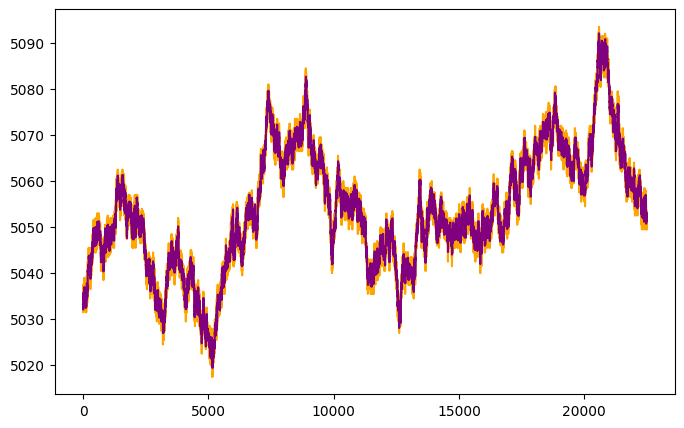

In [40]:
mid_i = test_regression_models(5, sdf, 'mid_price', 'mid_price')
best_mid = mid_i[3]

mids_p = best_mid.y_test
mid_preds_p = best_mid.y_pred
mid_diffs_p = mid_preds_p - mids_p

plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(mids_p)), mids_p, color='orange')
plt.plot(np.arange(len(mids_p)), mid_preds_p, color='purple')

plt.show()

In [41]:
best_mid.coef[::-1], best_mid.alpha

(array([0.20191911, 0.2027767 , 0.24851692, 0.34678923]), 0.0)

In [42]:
dtf = sdf.copy()

diff_series = dtf['bid_price_1'].diff()

In [43]:
diff_df = diff_series.iloc[1:].to_frame()
diff_df['sign'] = np.sign(diff_df['bid_price_1'])
diff_df['conseq_neg'] = 0
diff_df['conseq_pos'] = 0
diff_df['conseq_no_change'] = 0
is_negative = diff_df['sign'] == -1
is_positive = diff_df['sign'] == 1
is_no_change = diff_df['sign'] == 0
group_ids_neg = is_negative.ne(is_negative.shift()).cumsum()
group_ids_pos = is_positive.ne(is_positive.shift()).cumsum()
group_ids_no_change = is_no_change.ne(is_no_change.shift()).cumsum()

# Use these groups to count consecutive negatives only
diff_df.loc[is_negative, 'conseq_neg'] = is_negative.groupby(group_ids_neg).cumsum()
diff_df.loc[is_positive, 'conseq_pos'] = is_positive.groupby(group_ids_pos).cumsum()
diff_df.loc[is_no_change, 'conseq_no_change'] = is_no_change.groupby(group_ids_no_change).cumsum()


sequence_counts_neg = diff_df.conseq_neg.value_counts()[1:]
sequence_counts_pos = diff_df.conseq_pos.value_counts()[1:]
sequence_counts_no_change = diff_df.conseq_no_change.value_counts()[1:]

diff_df['prev_sign'] = diff_df['sign'].shift(1)
diff_df['neg_to_pos'] = ((diff_df['prev_sign'] == -1) & (diff_df['sign'] == 1)).astype(int)
diff_df['pos_to_neg'] = ((diff_df['prev_sign'] == 1) & (diff_df['sign'] == -1)).astype(int)
diff_df['pos_to_zero'] = ((diff_df['prev_sign'] == 1) & (diff_df['sign'] == 0)).astype(int)
diff_df['neg_to_zero'] = ((diff_df['prev_sign'] == -1) & (diff_df['sign'] == 0)).astype(int)
diff_df['zero_to_pos'] = ((diff_df['prev_sign'] == 0) & (diff_df['sign'] == 1)).astype(int)
diff_df['zero_to_neg'] = ((diff_df['prev_sign'] == 0) & (diff_df['sign'] == -1)).astype(int)

transitions_counts = {
    'Negative to Positive': diff_df['neg_to_pos'].sum() / len(dtf),
    'Positive to Negative': diff_df['pos_to_neg'].sum() / len(dtf),
    'Positive to Zero': diff_df['pos_to_zero'].sum() / len(dtf),
    'Negative to Zero': diff_df['neg_to_zero'].sum() / len(dtf),
    'Zero to Positive': diff_df['zero_to_pos'].sum() / len(dtf),
    'Zero to Negative': diff_df['zero_to_neg'].sum() / len(dtf),
}

# PONTENTIAL IMPLEMENTATION INTO STRATEGY

# SIMULATION LIKELY TO FILL BROKEN LEVELS

## Will bots allow you to continue downwards?

In [44]:
diff_df

,bid_price_1,sign,conseq_neg,conseq_pos,conseq_no_change,prev_sign,neg_to_pos,pos_to_neg,pos_to_zero,neg_to_zero,zero_to_pos,zero_to_neg
3,3.0,1.0,0,1,0,NaN,0,0,0,0,0,0
4,-3.0,-1.0,1,0,0,1.0,0,1,0,0,0,0
7,-1.0,-1.0,2,0,0,-1.0,0,0,0,0,0,0
9,-1.0,-1.0,3,0,0,-1.0,0,0,0,0,0,0
11,6.0,1.0,0,1,0,-1.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
59990,1.0,1.0,0,1,0,-1.0,1,0,0,0,0,0
59992,-1.0,-1.0,1,0,0,1.0,0,1,0,0,0,0
59995,5.0,1.0,0,1,0,-1.0,1,0,0,0,0,0
59996,-6.0,-1.0,1,0,0,1.0,0,1,0,0,0,0


In [45]:
transitions_counts

{'Negative to Positive': 0.10943333333333333,
 'Positive to Negative': 0.17083333333333334,
 'Positive to Zero': 0.07586666666666667,
 'Negative to Zero': 0.13583333333333333,
 'Zero to Positive': 0.13726666666666668,
 'Zero to Negative': 0.07443333333333334}

In [46]:
total_counts_neg = sequence_counts_neg.sum()
percentages_neg = (sequence_counts_neg / total_counts_neg)

total_counts_pos = sequence_counts_pos.sum()
percentages_pos = (sequence_counts_pos / total_counts_pos)

total_counts_no_change = sequence_counts_no_change.sum()
percentages_no_change = (sequence_counts_no_change / total_counts_no_change)

percentages_neg, percentages_pos, percentages_no_change

(conseq_neg
 1    0.863210
 2    0.125528
 3    0.010676
 4    0.000587
 Name: count, dtype: float64,
 conseq_pos
 1    0.865225
 2    0.122969
 3    0.011222
 4    0.000584
 Name: count, dtype: float64,
 conseq_no_change
 1     0.491563
 2     0.248607
 3     0.126780
 4     0.065635
 5     0.034133
 6     0.017492
 7     0.009056
 8     0.003715
 9     0.001703
 10    0.000774
 11    0.000310
 12    0.000232
 Name: count, dtype: float64)

In [47]:
r = 100

In [48]:
val4_b = sdf['mid_price'].shift(4)
val3_b = sdf['mid_price'].shift(3)
val2_b = sdf['mid_price'].shift(2)
val1_b = sdf['mid_price'].shift(1)

co4_b, co3_b, co2_b, co1_b = [-0.01869561,  0.0455032,  0.16316049,  0.8090892]
a_b = 4.481696494462085

vals_b = (co4_b*val4_b +  co3_b*val3_b  +co2_b*val2_b + co1_b*val1_b) + a_b

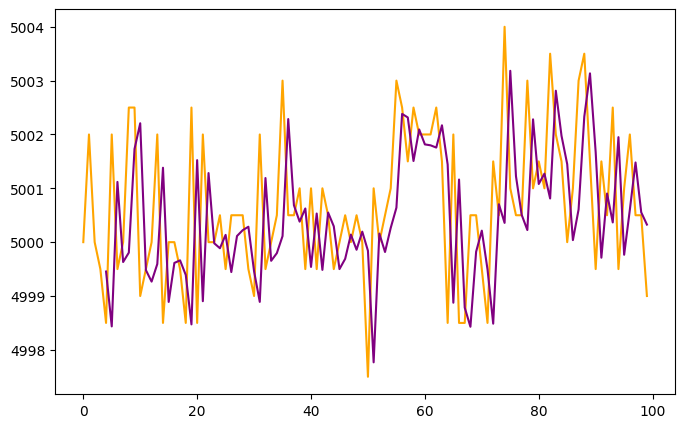

In [49]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(vals_b[:r])), sdf['mid_price'].iloc[:r], color='orange')
plt.plot(np.arange(len(vals_b[:r])), vals_b[:r], color='purple')
plt.show()

In [50]:
cond = (vals_b[:r] - sdf['mid_price'].iloc[:r]).to_frame()
mae = abs(cond).sum()
mse = (cond ** 2).sum()

mae.iloc[0], mse.iloc[0], cond[abs(cond['mid_price']) > 2].count()

(123.87189237715393,
 264.8629511976097,
 mid_price    26
 dtype: int64)

In [51]:
comp_co4_b, comp_co3_b, comp_co2_b, comp_co1_b = [-0.01869561,  0.0455032,  0.16316049,  0.8090892]
comp_a_b = 4.481696494462085

comp_vals_b = (comp_co4_b*val4_b +  comp_co3_b*val3_b  +comp_co2_b*val2_b + comp_co1_b*val1_b) + comp_a_b

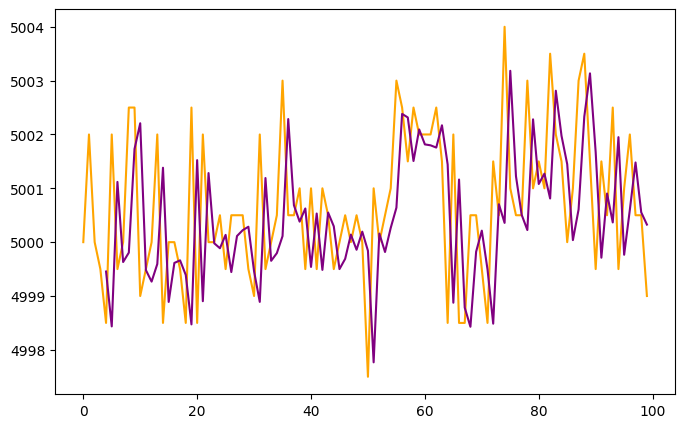

In [52]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(comp_vals_b[:r])), sdf['mid_price'].iloc[:r], color='orange')
plt.plot(np.arange(len(comp_vals_b[:r])), comp_vals_b[:r], color='purple')
plt.show()

In [53]:
comp_cond = (comp_vals_b[:r] - sdf['mid_price'].iloc[:r]).to_frame()
mae = abs(comp_cond).sum()
mse = (comp_cond ** 2).sum()

mae.iloc[0], mse.iloc[0], comp_cond[abs(comp_cond['mid_price']) > 2].count()

(123.87189237715393,
 264.8629511976097,
 mid_price    26
 dtype: int64)

In [54]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

In [55]:
estimator = LinearRegression()
val = KFold(5)


In [56]:
X = pd.DataFrame()
laggs = range(1, 5)
for i in laggs:
    X[f"lagg {i}"] = sdf.mid_price.shift(i)

X["midprice"] = sdf.mid_price
#X["const"] = 1
X.dropna(inplace=True)
y = X.pop("midprice")

mods = range(200, 1500, 100)
l = []
for i in mods:
    X_ = X.copy(deep=True)
    X_.loc[sdf.timestamp%i == 0, f"mod {i}"] = 1
    X_.loc[sdf.timestamp%i != 0, f"mod {i}"] = 0



    cross_val_score(LinearRegression(), X_, y)

    estimator.fit(X_,y)
    l += [estimator.coef_[-1]]
    

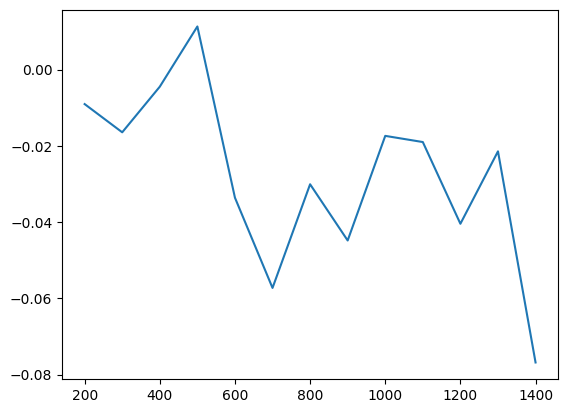

In [57]:
plt.plot(mods, l)

In [58]:
len(sdf)

30000

In [59]:
X

,lagg 1,lagg 2,lagg 3,lagg 4
9,4999.5,5000.0,5002.0,5000.0
11,4998.5,4999.5,5000.0,5002.0
12,5002.0,4998.5,4999.5,5000.0
15,4999.5,5002.0,4998.5,4999.5
17,5000.0,4999.5,5002.0,4998.5
...,...,...,...,...
59990,5051.5,5052.0,5051.5,5052.0
59992,5052.5,5051.5,5052.0,5051.5
59995,5051.0,5052.5,5051.5,5052.0
59996,5053.5,5051.0,5052.5,5051.5


In [60]:
cross_val_score(LinearRegression(), X, y)

array([0.99280243, 0.98679251, 0.99127288, 0.94287322, 0.97686751])

In [61]:
estimator.fit(X,y)
pd.DataFrame(estimator.coef_, columns=["value"], index = X.columns)

,value
lagg 1,0.341769
lagg 2,0.261069
lagg 3,0.207707
lagg 4,0.188988


In [62]:
mid_i = test_regression_models(5, sdf, 'mid_price', 'mid_price')
best_mid = mid_i[3]

mids_p = best_mid.y_test
mid_preds_p = best_mid.y_pred
mid_diffs_p = mid_preds_p - mids_p

In [63]:
mid_i = test_regression_models(5, sdf, 'mid_price', 'mid_price')
ind = 0
best_mid = mid_i[ind]

mids_p = best_mid.y_test
mid_preds_p = best_mid.y_pred
mid_diffs_p = mids_p.shift(1) - mids_p
err_past = abs(mid_diffs_p).dropna()

X_err = best_mid.X_test.copy()

X_err['err_sum'] = 0

for i in range(0, len(best_mid.coef)+1):
    X_err[f'err_shift_{i}'] = err_past.shift(i)
    if i != 0:
        X_err['err_sum'] += X_err[f'err_shift_{i}']

err_names = [ f'err_shift_{i}' for i in range(1, len(best_mid.coef)+1)]
X_err_test1 = X_err[err_names].dropna()
X_err_test2 = X_err[['err_sum']].dropna()

y_err_test = X_err[['err_shift_0']].iloc[len(best_mid.coef):]

X_err_test1 = sm.add_constant(X_err_test1)
model_err_1 = sm.OLS(err_past.iloc[ind+1:], X_err_test1).fit()
model_err_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mid_price   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     2701.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:35:32   Log-Likelihood:                -34195.
No. Observations:               22496   AIC:                         6.839e+04
Df Residuals:                   22494   BIC:                         6.841e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8195      0.011     76.982      0.000       0.799       0.840
err_shift_1     0.3274      0.006     51.971      0.000       0.315       0.340
==============================================================================
Omnibus:                     2919.486   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4260.580
Skew:                           0.977   Prob(JB):                         0.00
Kurtosis:                       3.851   Cond. No.                         2.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

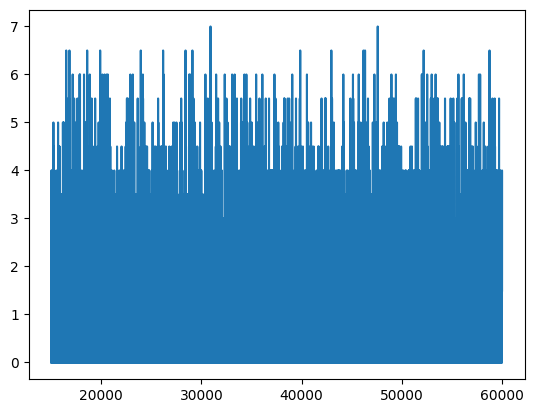

In [64]:
plt.plot(err_past)

In [65]:
X_new_err = best_mid.X_test.copy()
X_new_err[err_names] = X_err_test1[err_names]
X_new_err = X_new_err.dropna()

y_new_vals = mids_p.iloc[len(err_names)+1:]

# X_new_err = sm.add_constant(X_new_err)
model_new = sm.OLS(y_new_vals, X_new_err).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              mid_price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.006e+11
Date:                Tue, 16 Apr 2024   Prob (F-statistic):                        0.00
Time:                        21:35:32   Log-Likelihood:                         -43717.
No. Observations:               22496   AIC:                                  8.744e+04
Df Residuals:                   22494   BIC:                                  8.745e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
lagg 1          1.0000   3.22e-06   3.11e+05      0.000       1.000       1.000
err_shift_1    -0.0340      0.010     -3.534      0.000      -0.053      -0.015
==============================================================================
Omnibus:                      303.959   Durbin-Watson:                   2.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              558.094
Skew:                           0.041   Prob(JB):                    6.48e-122
Kurtosis:                       3.767   Cond. No.                     4.32e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
X_err_test2 = sm.add_constant(X_err_test2)
model_err_2 = sm.OLS(y_err_test.iloc[1:], X_err_test2).fit()
model_err_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            err_shift_0   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     2701.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:35:32   Log-Likelihood:                -34195.
No. Observations:               22496   AIC:                         6.839e+04
Df Residuals:                   22494   BIC:                         6.841e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8195      0.011     76.982      0.000       0.799       0.840
err_sum        0.3274      0.006     51.971      0.000       0.315       0.340
==============================================================================
Omnibus:                     2919.486   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4260.580
Skew:                           0.977   Prob(JB):                         0.00
Kurtosis:                       3.851   Cond. No.                         2.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
diff_df

,bid_price_1,sign,conseq_neg,conseq_pos,conseq_no_change,prev_sign,neg_to_pos,pos_to_neg,pos_to_zero,neg_to_zero,zero_to_pos,zero_to_neg
3,3.0,1.0,0,1,0,NaN,0,0,0,0,0,0
4,-3.0,-1.0,1,0,0,1.0,0,1,0,0,0,0
7,-1.0,-1.0,2,0,0,-1.0,0,0,0,0,0,0
9,-1.0,-1.0,3,0,0,-1.0,0,0,0,0,0,0
11,6.0,1.0,0,1,0,-1.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
59990,1.0,1.0,0,1,0,-1.0,1,0,0,0,0,0
59992,-1.0,-1.0,1,0,0,1.0,0,1,0,0,0,0
59995,5.0,1.0,0,1,0,-1.0,1,0,0,0,0,0
59996,-6.0,-1.0,1,0,0,1.0,0,1,0,0,0,0


In [68]:
df_vol = sdf.copy()

condition_bid = (df_vol['bid_price_1'] <= df_vol['mid_price'].shift(1)) | df_vol['bid_price_2'].isna()
bid_selected_series = np.where(condition_bid, df_vol['bid_price_1'], df_vol['bid_price_2'])

condition_ask = (df_vol['ask_price_1'] >= df_vol['mid_price'].shift(1)) | df_vol['ask_price_2'].isna()
ask_selected_series = np.where(condition_ask, df_vol['ask_price_1'], df_vol['ask_price_2'])

df_vol['bid_selected_series'] = bid_selected_series.astype(int)
df_vol['ask_selected_series'] = ask_selected_series.astype(int)

bi, ai = test_regression_models(5, df_vol, 'bid_price_1', 'bid_price_1'), test_regression_models(5, df_vol, 'ask_price_1', 'ask_price_1')

In [69]:
vol_check_b, vol_check_a = bi[3], ai[3]

df_vol_test = df_vol.iloc[30000-len(vol_check_a.y_pred):].copy()
df_vol_test['vol_check_b_ys'] = vol_check_b.y_pred
df_vol_test['vol_check_a_ys'] = vol_check_a.y_pred

In [70]:
vol_theos = []
for index, row in df_vol_test.iterrows():
    if row['bid_volume_1'] < row['ask_volume_1'] and not np.isnan(row['bid_price_2']):
        val_bid = row['bid_price_2']
        vol_theos.append((val_bid+row['ask_price_1'])/2)
    elif row['ask_volume_1'] < row['bid_volume_1'] and not np.isnan(row['ask_price_2']):
        val_ask = row['ask_price_2']
        vol_theos.append((val_ask + row['bid_price_1'])/2)
    else:
        vol_theos.append((row['vol_check_b_ys'] + row['vol_check_a_ys']) / 2)

df_vol_test['preds'] = vol_theos

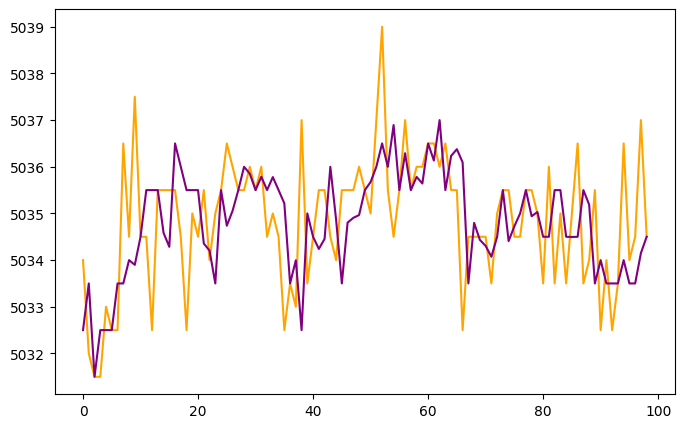

In [71]:
plt.figure(figsize=(8, 5))
shift = 0
r=100
plt.plot(np.arange(len(df_vol_test.mid_price[shift:r+shift].shift(-1))), df_vol_test.mid_price[shift:r+shift].shift(-1), color='orange')
plt.plot(np.arange(len(vol_theos[shift:r+shift-1])), vol_theos[shift:r+shift-1], color='purple')
plt.show()

In [72]:
vol_weighted_df = sdf.copy()

In [73]:
bid_volm_names = ['bid_volume_1', 'bid_volume_2', 'bid_volume_3']
ask_volm_names = ['ask_volume_1', 'ask_volume_2', 'ask_volume_3']

vol_weighted_df['tot_bid_vol'] = vol_weighted_df[bid_volm_names].sum(axis=1)
vol_weighted_df['tot_ask_vol'] = vol_weighted_df[ask_volm_names].sum(axis=1)

bid_weights = ['bid_weight_1', 'bid_weight_2', 'bid_weight_3']
ask_weights = ['ask_weight_1', 'ask_weight_2', 'ask_weight_3']

for i in range(0,3):
    bid_name = bid_volm_names[i]
    bid_weight = bid_weights[i]
    bid_price = f'bid_price_{i+1}'

    vol_weighted_df[bid_weight] = (vol_weighted_df[bid_name] / vol_weighted_df['tot_bid_vol'])*vol_weighted_df[bid_price]

for i in range(0,3):
    ask_name = ask_volm_names[i]
    ask_weight = ask_weights[i]
    ask_price = f'ask_price_{i+1}'

    vol_weighted_df[ask_weight] = vol_weighted_df[ask_name] / vol_weighted_df['tot_ask_vol']*vol_weighted_df[ask_price]

vol_weighted_df['weighted_bid'] = vol_weighted_df[bid_weights].sum(axis=1)
vol_weighted_df['weighted_ask'] = vol_weighted_df[ask_weights].sum(axis=1)
mid_weighted_vals = (vol_weighted_df['weighted_bid']+vol_weighted_df['weighted_ask'])/2

mid_weighted_vals = mid_weighted_vals[508:]

In [74]:
X_w = vol_weighted_df['weighted_bid'].shift(1).dropna()
X_w = X_w.reset_index(drop=True)
y_w = vol_weighted_df['bid_price_1'].iloc[:-1]
y_w = y_w.reset_index(drop=True)


w_mod = sm.OLS(y_w, X_w).fit()
w_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            bid_price_1   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.661e+11
Date:                Tue, 16 Apr 2024   Prob (F-statistic):                        0.00
Time:                        21:35:33   Log-Likelihood:                         -53532.
No. Observations:               29999   AIC:                                  1.071e+05
Df Residuals:                   29998   BIC:                                  1.071e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
weighted_bid     1.0001   1.65e-06   6.05e+05      0.000       1.000       1.000
==============================================================================
Omnibus:                    13812.852   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55454.010
Skew:                           2.379   Prob(JB):                         0.00
Kurtosis:                       7.661   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
w_bids = vol_weighted_df['weighted_bid'] * 1.000142
w_bids = w_bids.iloc[:-1]
w_y_b = vol_weighted_df['bid_price_1'].shift(-1).dropna()

w_asks = vol_weighted_df['weighted_ask'] * 1.000142
w_asks = w_asks.iloc[:-1]
w_y_a = vol_weighted_df['ask_price_1'].shift(-1).dropna()

In [76]:
vol_weighted_df['weighted_mid'] = (vol_weighted_df['weighted_bid'] + vol_weighted_df['weighted_ask'])/2
vol_weighted_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,tot_ask_vol,bid_weight_1,bid_weight_2,bid_weight_3,ask_weight_1,ask_weight_2,ask_weight_3,weighted_bid,weighted_ask,weighted_mid
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,...,26.0,4997.000000,NaN,NaN,5003.000000,NaN,NaN,4997.000000,5003.000000,5000.000000
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,...,20.0,806.451613,967.354839,3223.870968,5004.000000,NaN,NaN,4997.677419,5004.000000,5000.838710
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,...,31.0,161.193548,4834.838710,NaN,5003.000000,NaN,NaN,4996.032258,5003.000000,4999.516129
7,-2,300,STARFRUIT,4996,27,NaN,NaN,NaN,NaN,5003,...,27.0,4996.000000,NaN,NaN,5003.000000,NaN,NaN,4996.000000,5003.000000,4999.500000
9,-2,400,STARFRUIT,4995,20,NaN,NaN,NaN,NaN,5002,...,20.0,4995.000000,NaN,NaN,5002.000000,NaN,NaN,4995.000000,5002.000000,4998.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0,2999500,STARFRUIT,5049,28,NaN,NaN,NaN,NaN,5056,...,28.0,5049.000000,NaN,NaN,5056.000000,NaN,NaN,5049.000000,5056.000000,5052.500000
59992,0,2999600,STARFRUIT,5048,9,5047.0,27.0,NaN,NaN,5054,...,29.0,1262.000000,3785.250000,NaN,5054.000000,NaN,NaN,5047.250000,5054.000000,5050.625000
59995,0,2999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,...,26.0,187.148148,4861.037037,NaN,388.769231,4666.153846,NaN,5048.185185,5054.923077,5051.554131
59996,0,2999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,...,28.0,5047.000000,NaN,NaN,180.428571,4873.500000,NaN,5047.000000,5053.928571,5050.464286


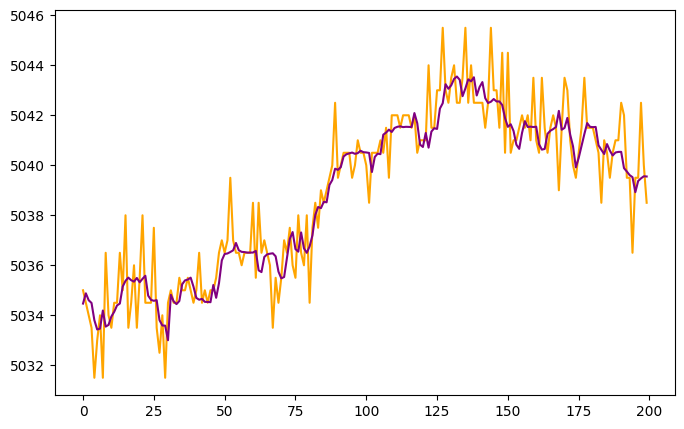

In [77]:
weight_mid_test = test_regression_models(5, vol_weighted_df, 'weighted_mid', 'mid_price')

weighted_y_preds = weight_mid_test[3].y_pred
weighted_y_test = weight_mid_test[3].y_test

weight_mid_test[3].coef[::-1], weight_mid_test[3].alpha

plt.figure(figsize=(8, 5))
shift = 100
r=200
plt.plot(np.arange(len(weighted_y_test[shift:r+shift])), weighted_y_test[shift:r+shift], color='orange')
plt.plot(np.arange(len(weighted_y_preds[shift:r+shift])), weighted_y_preds[shift:r+shift], color='purple')
plt.show()

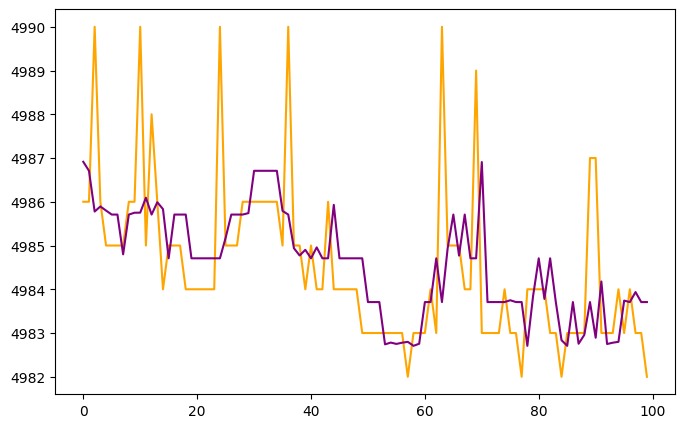

In [78]:
plt.figure(figsize=(8, 5))
shift = 510
r=100
plt.plot(np.arange(len(w_bids[shift:r+shift])), w_y_b[shift:r+shift], color='orange')
plt.plot(np.arange(len(w_bids[shift:r+shift])), w_bids[shift:r+shift], color='purple')
plt.show()

In [79]:
vol_weighted_df['weighted_mid'] = (vol_weighted_df['weighted_bid'] + vol_weighted_df['weighted_ask'])/2

# TRY EXPONENTIAL WEIGHTING

# TRY INTEGRATING BOOK STRATEGY AND WEIGHT STRATEGY

In [80]:
X_w_m = vol_weighted_df['weighted_mid'].shift(1).to_frame()
X_w_m = X_w_m.dropna()

y_w_m = vol_weighted_df['mid_price'].iloc[1:]

w_mod_m = sm.OLS(y_w_m, X_w_m).fit()
w_mod_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              mid_price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.744e+11
Date:                Tue, 16 Apr 2024   Prob (F-statistic):                        0.00
Time:                        21:35:34   Log-Likelihood:                         -49660.
No. Observations:               29999   AIC:                                  9.932e+04
Df Residuals:                   29998   BIC:                                  9.933e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
weighted_mid     1.0000   1.45e-06   6.89e+05      0.000       1.000       1.000
==============================================================================
Omnibus:                      796.449   Durbin-Watson:                   2.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1953.373
Skew:                           0.055   Prob(JB):                         0.00
Kurtosis:                       4.245   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

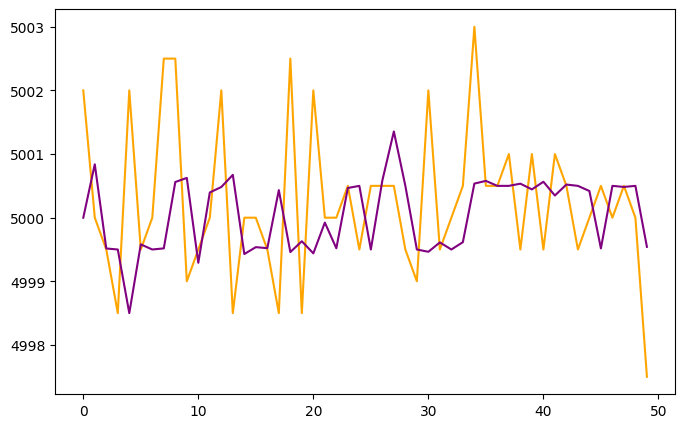

In [81]:
shift = 0
r=50
plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(y_w_m[shift:r+shift])), y_w_m[shift:r+shift], color='orange')
plt.plot(np.arange(len(X_w_m[shift:r+shift])), X_w_m[shift:r+shift], color='purple')
plt.show()

In [82]:
new_app_df = sdf.copy()

In [83]:
new_app_df['bid_diff'] = np.sign(new_app_df.bid_price_1.diff().fillna(0))

In [84]:
new_app_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,bid_selected_series,ask_selected_series,bid_diff
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0,4997,5003,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0,5000,5004,1.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0,4997,5003,-1.0
7,-2,300,STARFRUIT,4996,27,NaN,NaN,NaN,NaN,5003,27,NaN,NaN,NaN,NaN,4999.5,0.0,4996,5003,-1.0
9,-2,400,STARFRUIT,4995,20,NaN,NaN,NaN,NaN,5002,20,NaN,NaN,NaN,NaN,4998.5,0.0,4995,5002,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0,2999500,STARFRUIT,5049,28,NaN,NaN,NaN,NaN,5056,28,NaN,NaN,NaN,NaN,5052.5,0.0,5049,5056,1.0
59992,0,2999600,STARFRUIT,5048,9,5047.0,27.0,NaN,NaN,5054,29,NaN,NaN,NaN,NaN,5051.0,0.0,5048,5054,-1.0
59995,0,2999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0,5048,5054,1.0
59996,0,2999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0,5047,5054,-1.0


# Conversions NOT available yet. Probably to do w arb or offloading inventory. 

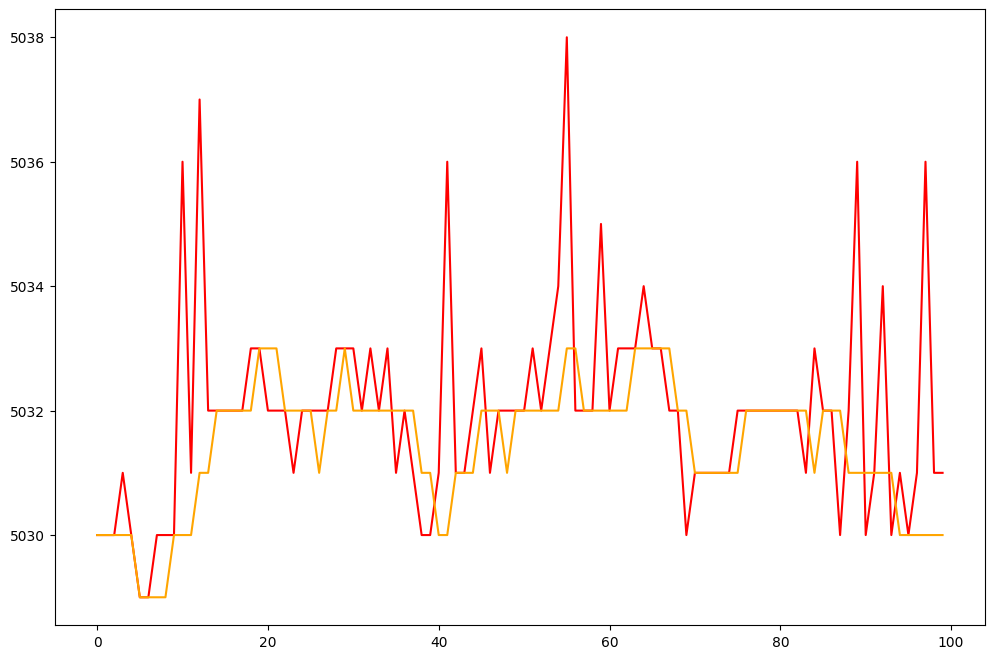

In [85]:
weight_bid_test = test_regression_models(5, vol_weighted_df, 'weighted_bid', 'bid_price_1')
weight_ask_test = test_regression_models(5, vol_weighted_df, 'weighted_ask', 'ask_price_1')

index_weighted = 2

bweighted_y_preds = weight_bid_test[index_weighted].y_pred.astype(int)
bweighted_y_test = weight_bid_test[index_weighted].y_test

aweighted_y_preds = weight_ask_test[index_weighted].y_pred.astype(int)
aweighted_y_test = weight_ask_test[index_weighted].y_test

mweighted_y_preds = (aweighted_y_preds+bweighted_y_preds)/2
mweighted_y_test = (aweighted_y_test+bweighted_y_test)/2

plt.figure(figsize=(12, 8))
shift = 0
r=100
plt.plot(np.arange(len(bweighted_y_test[shift:r+shift])), bweighted_y_test[shift:r+shift], color='red')
plt.plot(np.arange(len(bweighted_y_preds[shift:r+shift])), bweighted_y_preds[shift:r+shift], color='orange')
plt.show()

How far back of a history should I use based on autocorrelation? Partial autocorrelation

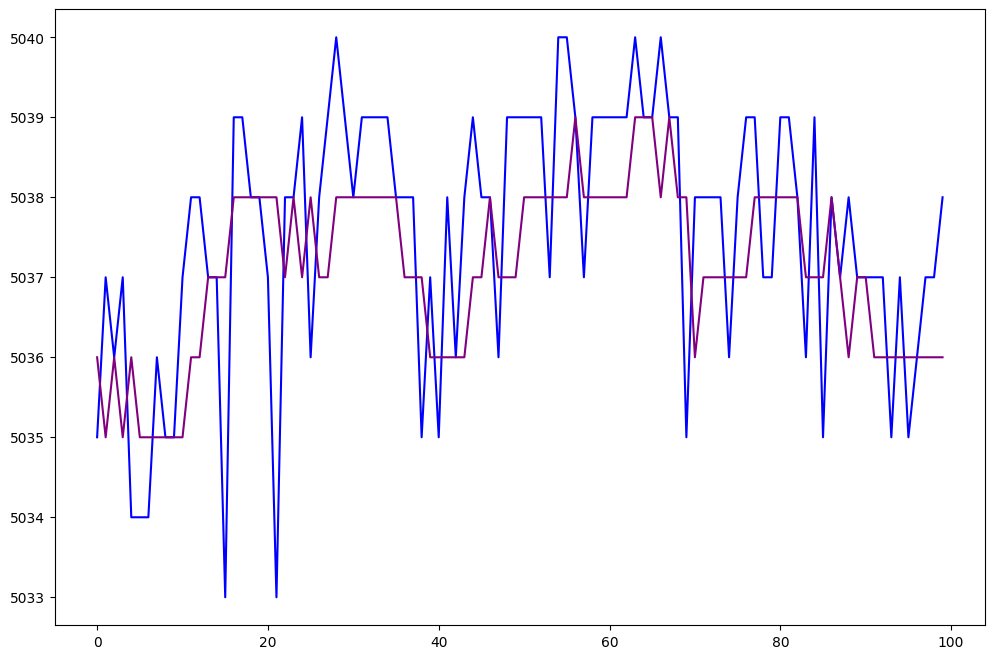

In [86]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(aweighted_y_test[shift:r+shift])), aweighted_y_test[shift:r+shift], color='blue')
plt.plot(np.arange(len(aweighted_y_preds[shift:r+shift])), aweighted_y_preds[shift:r+shift], color='purple')
plt.show()

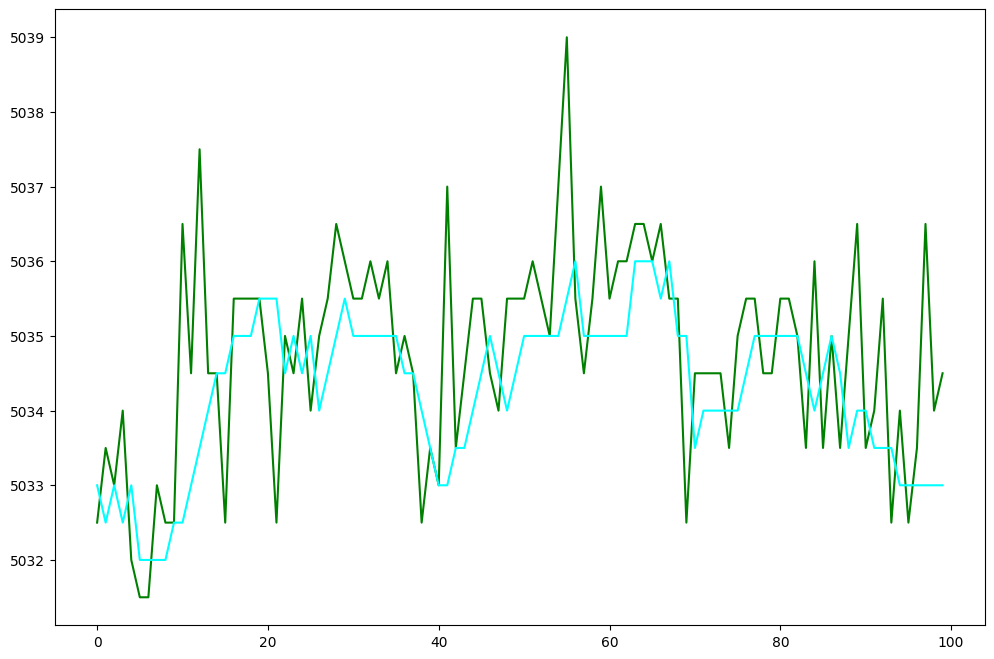

In [87]:
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(mweighted_y_test[shift:r+shift])), mweighted_y_test[shift:r+shift], color='green')
plt.plot(np.arange(len(mweighted_y_preds[shift:r+shift])),mweighted_y_preds[shift:r+shift], color='cyan')

In [88]:
weight_bid_test[index_weighted].coef[::-1]

array([0.09586395, 0.17745478, 0.72683211])

In [89]:
weight_ask_test[index_weighted].coef[::-1]

array([0.10164347, 0.24079169, 0.65741821])

In [90]:
weight_mid_test[index_weighted].coef[::-1]

array([0.08442609, 0.18264657, 0.7329293 ])

<Figure size 1000x600 with 0 Axes>

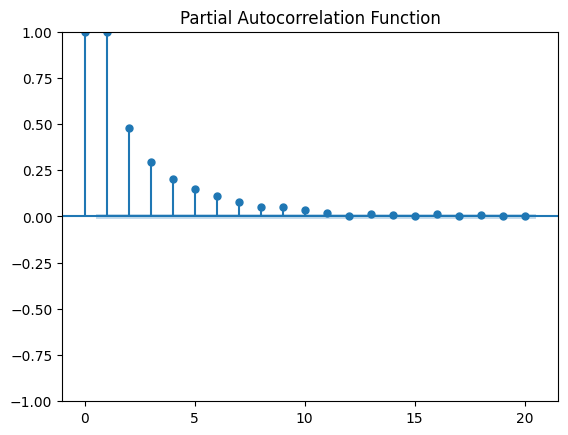

<Figure size 1000x600 with 0 Axes>

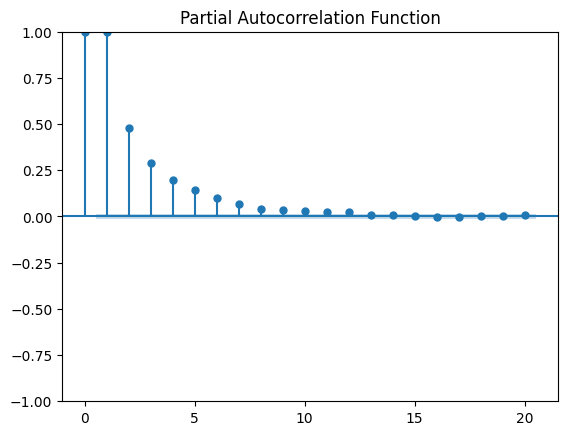

In [91]:
plt.figure(figsize=(10, 6))
plot_pacf(sdf.bid_price_1, lags=20)
plt.title("Partial Autocorrelation Function")
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(sdf.ask_price_1, lags=20)
plt.title("Partial Autocorrelation Function")
plt.show()

In [92]:
dfb1 = de2.data['round_1']['price_df']
dfb2 = de2.data['round_2']['price_df']
dfb3 = de2.data['round_3']['price_df']
dfb4 = de2.data['round_4']['price_df']

dfb2 = dfb2[(dfb2['product'] == 'PINA_COLADAS')]
dfb3 = dfb3[(dfb3['product'] == 'PINA_COLADAS')  & (dfb3.day == 2)]
dfb4 = dfb4[(dfb4['product'] == 'PINA_COLADAS') & (dfb4.day == 3)]

pcdf = pd.concat([dfb2, dfb3, dfb4])

dfb1 = de2.data['round_1']['price_df']
dfb2 = de2.data['round_2']['price_df']
dfb3 = de2.data['round_3']['price_df']
dfb4 = de2.data['round_4']['price_df']

dfb2 = dfb2[(dfb2['product'] == 'COCONUTS')]
dfb3 = dfb3[(dfb3['product'] == 'COCONUTS')  & (dfb3.day == 2)]
dfb4 = dfb4[(dfb4['product'] == 'COCONUTS') & (dfb4.day == 3)]

cocodf = pd.concat([dfb2, dfb3, dfb4])

In [93]:
y = pcdf.mid_price
X = cocodf.mid_price

y_pc = np.array(y[:30_000])
X_pc = np.array(X[:30_000])

model_pc_fitted = sm.OLS(y_pc, X_pc).fit()

model_pc_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.781e+09
Date:                Tue, 16 Apr 2024   Prob (F-statistic):                        0.00
Time:                        21:35:34   Log-Likelihood:                     -1.5139e+05
No. Observations:               30000   AIC:                                  3.028e+05
Df Residuals:                   29999   BIC:                                  3.028e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.8750   2.71e-05   6.91e+04      0.000       1.875       1.875
==============================================================================
Omnibus:                      863.059   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              945.261
Skew:                           0.415   Prob(JB):                    5.48e-206
Kurtosis:                       3.257   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

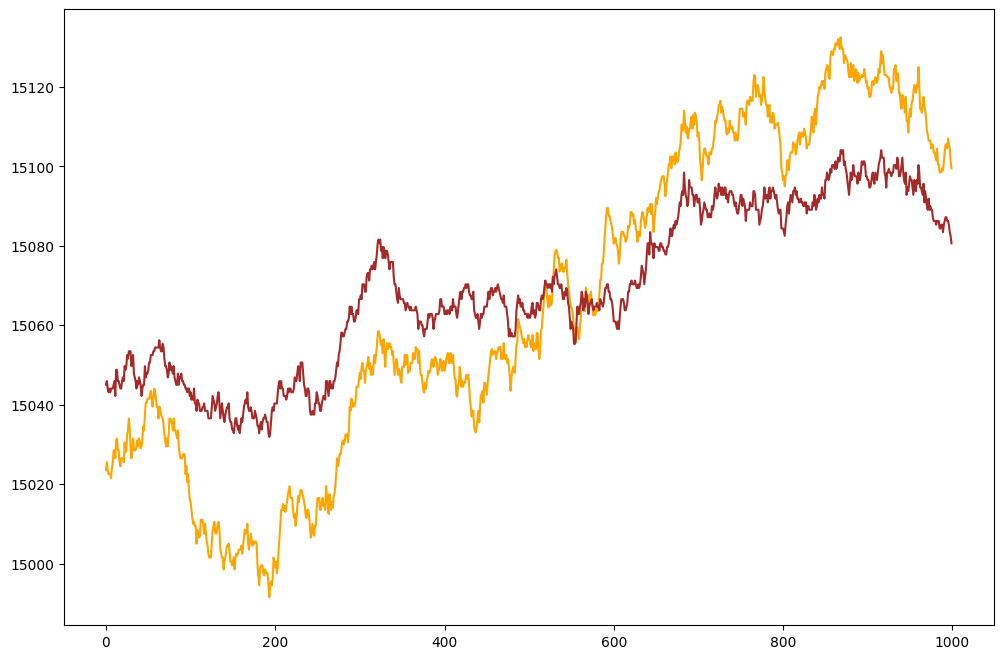

In [94]:
r_pc= 1000
shift_pc = 3000
coef_pc = 1.875
alpha_pc = 0

plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(y[shift_pc:shift_pc+r_pc])), y[shift_pc:shift_pc+r_pc], color='orange')
plt.plot(np.arange(len(X[shift_pc:shift_pc+r_pc])), (X[shift_pc:shift_pc+r_pc]*coef_pc)+alpha_pc, color='brown')
plt.show()

In [95]:
diff_y = y.reset_index(drop=True)

diff_X = X.reset_index(drop=True)
diff_X = coef_pc*diff_X + alpha_pc

diff_df = diff_y - diff_X
std_diff, mean_diff = diff_df[:50_000].std(), diff_df[:50_000].mean()
hyper_param_upper, hyper_param_lower = 0.66, 0.33

In [96]:
std_diff, mean_diff

(33.22746119758931, 4.1457)

In [97]:
def update_plot(window_size, shift_from_0):
    open_threshold = hyper_param_upper*std_diff
    close_threshold = hyper_param_lower*std_diff

    fig, axs = plt.subplots(2,1, sharex=True, height_ratios=[0.66,0.34])
    plt.figure(figsize=(12, 8))

    x_values = np.arange(len(diff_df[shift_from_0:shift_from_0+window_size]))
    y_values = diff_df[shift_from_0:shift_from_0+window_size]
    y_asset1 =  y[shift_from_0:shift_from_0+window_size]
    y_asset2 = (X[shift_from_0:shift_from_0+window_size]*coef_pc)+alpha_pc

    axs[0].plot(x_values, y_asset1, color='orange', label="Pina Colada")
    axs[0].plot(x_values, y_asset2, color='brown', label="Coconut")
    axs[0].legend()
    axs[1].axhline(y=close_threshold, linestyle='--', color='red')
    axs[1].axhline(y=-close_threshold, linestyle='--', color='red')
    axs[1].axhline(y=open_threshold, linestyle='--', color='green')
    axs[1].axhline(y=-open_threshold, linestyle='--', color='green')

    axs[1].plot(x_values, y_values, color='black', label='Spread Mid Price')
    axs[1].fill_between(x_values, y_values, open_threshold, where=(y_values > open_threshold), color='green', alpha=0.5, interpolate=True)
    axs[1].fill_between(x_values, y_values, -open_threshold, where=(y_values < -open_threshold), color='red', alpha=0.5, interpolate=True)

    axs[1].fill_between(x_values, close_threshold, open_threshold, color='gray', alpha=0.3)
    axs[1].fill_between(x_values, -open_threshold, -close_threshold, color='gray', alpha=0.3)
    
    axs[1].legend()

    plt.show()

In [98]:
plot_w_slider = interact(update_plot, window_size=(100, len(diff_df), 100), shift_from_0=(0, len(diff_df)-100, 100))

interactive(children=(IntSlider(value=25000, description='window_size', max=50000, min=100, step=100), IntSlid…

### self.spread_action Paramater in Trader Class
Three states: 'grow_spread', 'shrink_spread', 'market_make'

'grow_spread':
* Any time the spread goes above the top green line or below the bottom green line, self.spread_action changed to 'grow_spread'
* Buys/shorts the spread (depending on direction) until self.grow_spread changes or position limit reached

'shrink_spread':
* If self.spread_action == 'grow_spread', then we cheack if the spread is between the red lines. If it is, then we begin to approach a net 0 position.

'market_make':
* If our spread position is close to net 0, then self.spread_action = 'market_make'
* We continue to market make both assets until we hit 'grow_spread' again

### Note that we could also decide that if we are in the purple, then we just market make until we cross one of the lines again

##################################################################################

### Addressing spread position maximum/minimum

As you can see from above, we have long periods of time where we are below/above the green line. This is opportunity to miss PnL, as we are going to reach our position limits and be stuck holding. Of course we will make money when it inevitably reverts back to 0, but there is a time opportunity cost where we hold the spread without trading for additional profit. Additionally, we may find that we are holding a spread position and better spread prices come up once we have hit our position limit.

#### Ideas to solve this issue:
* Moving average calculation -> once we hit position limits, we begin to check if the spread is above/below moving average. Contingent on where the spread is compared to MA, we begin to shrink the spread (keeping xx% of our position). Once we hit xx% (let's say we go from 100% to 80% of position limit), we begin to grow our spread again if self.spread_action == 'grow_spread'. We repeat this process for short-term PnL gains without liquidating too much of the position.
* Simple shrinking -> rather than using the moving average as an indicator, we could also just begin to sell off shares up to xx% of position limit once we hit 100%. This is essentially the same strategy as above, but we don't have the MA check.
* Percentage base drop -> If we observe a yy% drop in spread value from the maximum observed value, then we can repeat the above strategy to make more room for the spread.


##################################################################################

In [99]:
y_asset1 =  y
y_asset2 = (X*coef_pc)+alpha_pc

In [100]:
ass_1_pct = y_asset1.pct_change().dropna()
ass_2_pct = y_asset2.pct_change().dropna()


In [101]:
ass_1_pct

6         0.000000
10       -0.000033
13        0.000033
16       -0.000067
21       -0.000033
            ...   
329953    0.000235
329956    0.000168
329973    0.000469
329986   -0.000134
329991   -0.000201
Name: mid_price, Length: 49999, dtype: float64

In [102]:
ass_1_pct.iloc[:-i]

6         0.000000
10       -0.000033
13        0.000033
16       -0.000067
21       -0.000033
            ...   
329926    0.000201
329942    0.000134
329953    0.000235
329956    0.000168
329973    0.000469
Name: mid_price, Length: 49997, dtype: float64

In [103]:
for i in range(1,5):
    print(np.corrcoef([ass_2_pct.iloc[i:], ass_1_pct.iloc[:-i]]))

[[ 1.         -0.00276621]
 [-0.00276621  1.        ]]
[[ 1.         -0.00249178]
 [-0.00249178  1.        ]]
[[1.         0.00213667]
 [0.00213667 1.        ]]
[[ 1.         -0.00166333]
 [-0.00166333  1.        ]]


# TRADE DATA AND PC/COCO WEIGHTINGS

In [104]:
full_trade_df = de2.data['round_5']['trade_df'].copy()
full_trade_df.timestamp = (full_trade_df.timestamp / 100).astype(int)
full_trade_df[full_trade_df.symbol == 'COCONUTS']

,timestamp,buyer,seller,symbol,currency,price,quantity,day
5348,10016,Charlie,Pablo,COCONUTS,SEASHELLS,8000.0,30,-1
5361,10028,Charlie,Peter,COCONUTS,SEASHELLS,7997.0,10,-1
5382,10034,Caesar,Caesar,COCONUTS,SEASHELLS,7996.0,40,-1
5411,10052,Charlie,Peter,COCONUTS,SEASHELLS,7997.0,9,-1
5479,10114,Caesar,Peter,COCONUTS,SEASHELLS,8004.0,10,-1
...,...,...,...,...,...,...,...,...
87398,59920,Caesar,Peter,COCONUTS,SEASHELLS,7944.0,9,3
87412,59937,Peter,Charlie,COCONUTS,SEASHELLS,7949.0,7,3
87455,59986,Caesar,Peter,COCONUTS,SEASHELLS,7940.0,5,3
87457,59988,Caesar,Caesar,COCONUTS,SEASHELLS,7940.0,24,3


In [105]:
vol_weighted_df_2 = cocodf.copy()

In [106]:
bid_volm_names = ['bid_volume_1', 'bid_volume_2', 'bid_volume_3']
ask_volm_names = ['ask_volume_1', 'ask_volume_2', 'ask_volume_3']

vol_weighted_df_2['tot_bid_vol'] = vol_weighted_df_2[bid_volm_names].sum(axis=1)
vol_weighted_df_2['tot_ask_vol'] = vol_weighted_df_2[ask_volm_names].sum(axis=1)

bid_weights = ['bid_weight_1', 'bid_weight_2', 'bid_weight_3']
ask_weights = ['ask_weight_1', 'ask_weight_2', 'ask_weight_3']

for i in range(0,3):
    bid_name = bid_volm_names[i]
    bid_weight = bid_weights[i]
    bid_price = f'bid_price_{i+1}'

    vol_weighted_df_2[bid_weight] = (vol_weighted_df_2[bid_name] / vol_weighted_df_2['tot_bid_vol'])*vol_weighted_df_2[bid_price]

for i in range(0,3):
    ask_name = ask_volm_names[i]
    ask_weight = ask_weights[i]
    ask_price = f'ask_price_{i+1}'

    vol_weighted_df_2[ask_weight] = vol_weighted_df_2[ask_name] / vol_weighted_df_2['tot_ask_vol']*vol_weighted_df_2[ask_price]

vol_weighted_df_2['weighted_bid'] = vol_weighted_df_2[bid_weights].sum(axis=1)
vol_weighted_df_2['weighted_ask'] = vol_weighted_df_2[ask_weights].sum(axis=1)
mid_weighted_vals = (vol_weighted_df_2['weighted_bid']+vol_weighted_df_2['weighted_ask'])/2

vol_weighted_df_2['weighted_mid'] = mid_weighted_vals

In [107]:
vol_weighted_df_3 = pcdf.copy()

In [108]:
bid_volm_names = ['bid_volume_1', 'bid_volume_2', 'bid_volume_3']
ask_volm_names = ['ask_volume_1', 'ask_volume_2', 'ask_volume_3']

vol_weighted_df_3['tot_bid_vol'] = vol_weighted_df_3[bid_volm_names].sum(axis=1)
vol_weighted_df_3['tot_ask_vol'] = vol_weighted_df_3[ask_volm_names].sum(axis=1)

bid_weights = ['bid_weight_1', 'bid_weight_2', 'bid_weight_3']
ask_weights = ['ask_weight_1', 'ask_weight_2', 'ask_weight_3']

for i in range(0,3):
    bid_name = bid_volm_names[i]
    bid_weight = bid_weights[i]
    bid_price = f'bid_price_{i+1}'

    vol_weighted_df_3[bid_weight] = (vol_weighted_df_3[bid_name] / vol_weighted_df_3['tot_bid_vol'])*vol_weighted_df_3[bid_price]

for i in range(0,3):
    ask_name = ask_volm_names[i]
    ask_weight = ask_weights[i]
    ask_price = f'ask_price_{i+1}'

    vol_weighted_df_3[ask_weight] = vol_weighted_df_3[ask_name] / vol_weighted_df_3['tot_ask_vol']*vol_weighted_df_3[ask_price]

vol_weighted_df_3['weighted_bid'] = vol_weighted_df_3[bid_weights].sum(axis=1)
vol_weighted_df_3['weighted_ask'] = vol_weighted_df_3[ask_weights].sum(axis=1)
mid_weighted_vals = (vol_weighted_df_3['weighted_bid']+vol_weighted_df_3['weighted_ask'])/2

vol_weighted_df_3['weighted_mid'] = mid_weighted_vals

In [109]:
coco_weight = test_regression_models(5, vol_weighted_df_2, 'weighted_bid', 'bid_price_1')

In [110]:
pc_weight = test_regression_models(5, vol_weighted_df_3, 'weighted_bid', 'bid_price_1')

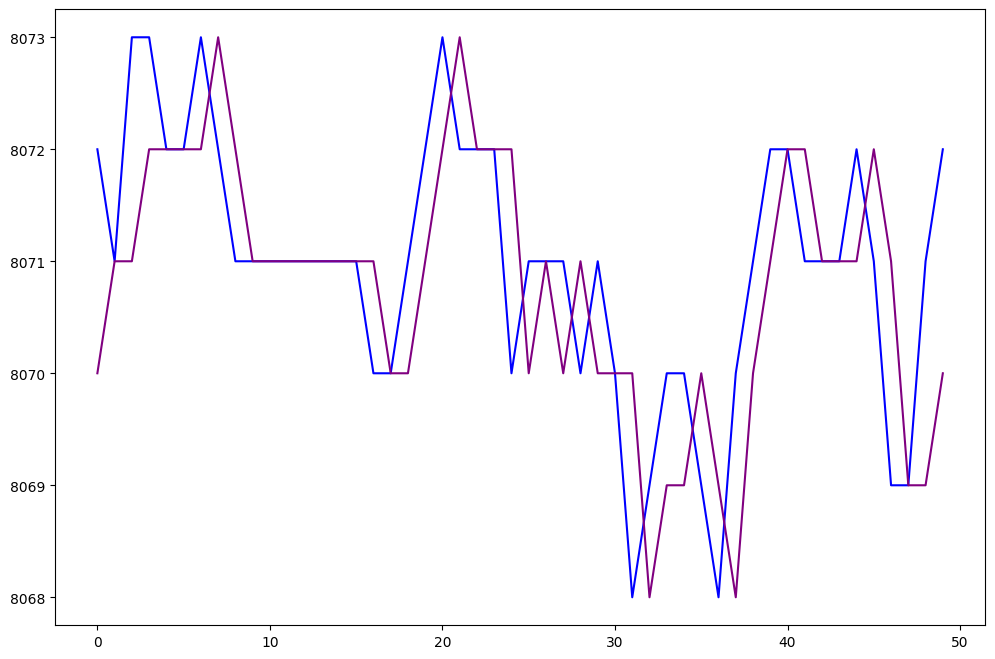

In [111]:
coco_preds = np.around(coco_weight[1].y_pred, decimals=0)
coco_test = coco_weight[1].y_test

r_coco = 50
shift_coco = 30

plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(coco_test[shift_coco:shift_coco+r_coco])), coco_test[shift_coco:shift_coco+r_coco], color='blue')
plt.plot(np.arange(len(coco_preds[shift_coco:shift_coco+r_coco])), coco_preds[shift_coco:shift_coco+r_coco], color='purple')
plt.show()

<Figure size 1000x600 with 0 Axes>

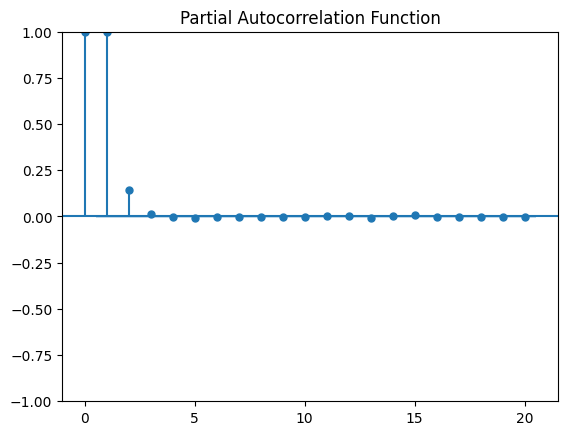

<Figure size 1000x600 with 0 Axes>

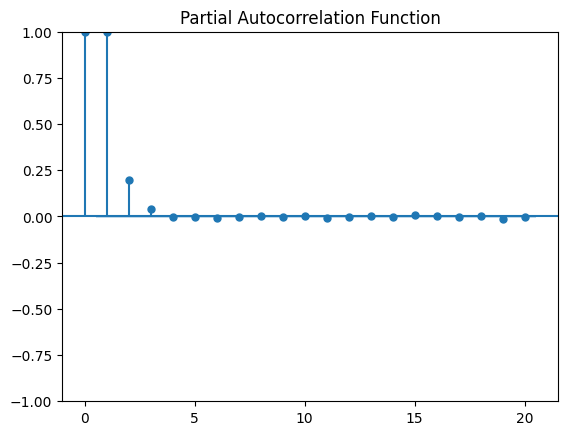

In [112]:
plt.figure(figsize=(10, 6))
plot_pacf(cocodf.bid_price_1, lags=20)
plt.title("Partial Autocorrelation Function")
plt.show()

plt.figure(figsize=(10, 6))
plot_pacf(cocodf.ask_price_1, lags=20)
plt.title("Partial Autocorrelation Function")
plt.show()

In [113]:
sdf

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,bid_selected_series,ask_selected_series
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0,4997,5003
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0,5000,5004
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0,4997,5003
7,-2,300,STARFRUIT,4996,27,NaN,NaN,NaN,NaN,5003,27,NaN,NaN,NaN,NaN,4999.5,0.0,4996,5003
9,-2,400,STARFRUIT,4995,20,NaN,NaN,NaN,NaN,5002,20,NaN,NaN,NaN,NaN,4998.5,0.0,4995,5002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0,2999500,STARFRUIT,5049,28,NaN,NaN,NaN,NaN,5056,28,NaN,NaN,NaN,NaN,5052.5,0.0,5049,5056
59992,0,2999600,STARFRUIT,5048,9,5047.0,27.0,NaN,NaN,5054,29,NaN,NaN,NaN,NaN,5051.0,0.0,5048,5054
59995,0,2999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0,5048,5054
59996,0,2999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0,5047,5054


In [114]:
overfit_weight = vol_weighted_df.weighted_bid
overfit_mid = vol_weighted_df.bid_price_1

In [115]:
X_overfit = pd.DataFrame(columns=[f"lagg {i+1}" for i in range(3)])
for j in range(3):
    X_overfit[f"lagg {j+1}"] = overfit_weight.shift(j+1)

X_overfit = X_overfit.dropna()

y_overfit = overfit_mid[3:int(len(X_overfit)/2)].copy()
X_overfit = X_overfit[:int(len(X_overfit)/2)]

len(X_overfit)

14998

In [116]:
weight_bid_test[index_weighted].coef[::-1]

array([0.09586395, 0.17745478, 0.72683211])

In [117]:
weight_ask_test[index_weighted].coef[::-1]

array([0.10164347, 0.24079169, 0.65741821])

In [118]:
weight_mid_test[index_weighted].coef[::-1]

array([0.08442609, 0.18264657, 0.7329293 ])

In [119]:
sdf_ind = sdf.copy()
sdf_ind.reset_index(drop=True, inplace=True)

In [120]:
diff_test = sdf_ind[~sdf_ind.bid_price_3.isna()].timestamp.diff()

infd = diff_test.index

In [121]:
signal_df = sdf_ind[(sdf_ind.index.isin(infd)) | sdf_ind.index.isin(infd+1) | (sdf_ind.index.isin(infd-1)) | (sdf_ind.index.isin(infd-2)) | (sdf_ind.index.isin(infd+2))].copy()
signal_df['signal'] = signal_df['mid_price'] - signal_df['bid_price_1']

display(signal_df.iloc[:20])
signal_df.iloc[20:40]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,bid_selected_series,ask_selected_series,signal
0,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0,4997,5003,3.0
1,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0,5000,5004,2.0
2,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0,4997,5003,3.0
3,-2,300,STARFRUIT,4996,27,NaN,NaN,NaN,NaN,5003,27,NaN,NaN,NaN,NaN,4999.5,0.0,4996,5003,3.5
17,-2,1700,STARFRUIT,4997,28,NaN,NaN,NaN,NaN,5002,2,5004.0,28.0,NaN,NaN,4999.5,0.0,4997,5002,2.5
18,-2,1800,STARFRUIT,4996,24,NaN,NaN,NaN,NaN,5001,1,5003.0,24.0,NaN,NaN,4998.5,0.0,4996,5001,2.5
19,-2,1900,STARFRUIT,5002,1,4997.0,1.0,4996.0,25.0,5003,26,NaN,NaN,NaN,NaN,5002.5,0.0,4997,5003,0.5
20,-2,2000,STARFRUIT,4996,31,NaN,NaN,NaN,NaN,5001,2,5003.0,31.0,NaN,NaN,4998.5,0.0,4996,5003,2.5
21,-2,2100,STARFRUIT,5001,4,4997.0,2.0,4996.0,20.0,5003,22,NaN,NaN,NaN,NaN,5002.0,0.0,4997,5003,1.0
22,-2,2200,STARFRUIT,4997,1,4996.0,25.0,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0,4997,5003,3.0


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,bid_selected_series,ask_selected_series,signal
57,-2,5700,STARFRUIT,4999,29,NaN,NaN,NaN,NaN,5004,4,5006.0,29.0,NaN,NaN,5001.5,0.0,4999,5004,2.5
76,-2,7600,STARFRUIT,4997,30,NaN,NaN,NaN,NaN,5004,30,NaN,NaN,NaN,NaN,5000.5,0.0,4997,5004,3.5
77,-2,7700,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5004,26,NaN,NaN,NaN,NaN,5000.5,0.0,4997,5004,3.5
78,-2,7800,STARFRUIT,5002,1,4998.0,1.0,4997.0,21.0,5004,22,NaN,NaN,NaN,NaN,5003.0,0.0,4998,5004,1.0
79,-2,7900,STARFRUIT,4998,30,NaN,NaN,NaN,NaN,5004,1,5005.0,29.0,NaN,NaN,5001.0,0.0,4998,5004,3.0
80,-2,8000,STARFRUIT,4998,24,NaN,NaN,NaN,NaN,5005,24,NaN,NaN,NaN,NaN,5001.5,0.0,4998,5005,3.5
85,-2,8500,STARFRUIT,4998,1,4997.0,23.0,NaN,NaN,5002,2,5004.0,24.0,NaN,NaN,5000.0,0.0,4998,5002,2.0
86,-2,8600,STARFRUIT,4998,1,4997.0,27.0,NaN,NaN,5004,28,NaN,NaN,NaN,NaN,5001.0,0.0,4998,5004,3.0
87,-2,8700,STARFRUIT,5002,9,4998.0,6.0,4997.0,24.0,5004,24,NaN,NaN,NaN,NaN,5003.0,0.0,4998,5004,1.0
88,-2,8800,STARFRUIT,5003,1,4997.0,20.0,NaN,NaN,5004,20,NaN,NaN,NaN,NaN,5003.5,0.0,5003,5004,0.5


In [122]:
signal_w_mid = vol_weighted_df.weighted_mid.copy()
signal_mid = vol_weighted_df.mid_price.copy()
signal_mid.reset_index(drop=True, inplace=True)

In [123]:
signal_sdf = sdf.copy()

In [124]:
bid_3_sig = signal_sdf[~(signal_sdf['bid_price_1'].isna()) & ~(signal_sdf['bid_price_2'].isna()) & ~(signal_sdf['bid_price_3'].isna())]
bid_2_sig = signal_sdf[~(signal_sdf['bid_price_1'].isna()) & ~(signal_sdf['bid_price_2'].isna()) & (signal_sdf['bid_price_3'].isna())]

ask_3_sig = signal_sdf[~(signal_sdf['ask_price_1'].isna()) & ~(signal_sdf['ask_price_2'].isna()) & ~(signal_sdf['ask_price_3'].isna())]
ask_2_sig = signal_sdf[~(signal_sdf['ask_price_1'].isna()) & ~(signal_sdf['ask_price_2'].isna()) & (signal_sdf['ask_price_3'].isna())]

In [125]:
signal_sdf['bid_signal_3'] = 0
signal_sdf.loc[bid_3_sig.index, 'bid_signal_3'] = 1
signal_sdf['bid_signal_2'] = 0
signal_sdf.loc[bid_2_sig.index, 'bid_signal_2'] = 1

signal_sdf['ask_signal_3'] = 0
signal_sdf.loc[ask_3_sig.index, 'ask_signal_3'] = 1
signal_sdf['ask_signal_2'] = 0
signal_sdf.loc[ask_2_sig.index, 'ask_signal_2'] = 1

signal_sdf.reset_index(drop=True, inplace=True)

In [126]:
X_signal = pd.DataFrame(columns=[f"lagg {i+1}" for i in range(3)])
for j in range(3):
    X_signal[f"lagg {j+1}"] = signal_w_mid.shift(j+1)

X_signal.reset_index(drop=True, inplace=True)

X_signal['bid_signal_3'] = signal_sdf['bid_signal_3'].shift(1)
X_signal['ask_signal_3'] = signal_sdf['ask_signal_3'].shift(1)
X_signal['ask_signal_2'] = signal_sdf['ask_signal_2'].shift(1)

X_signal = X_signal.dropna()

X_signal

,lagg 1,lagg 2,lagg 3,bid_signal_3,ask_signal_3,ask_signal_2
3,4999.516129,5000.838710,5000.000000,0.0,0.0,0.0
4,4999.500000,4999.516129,5000.838710,0.0,0.0,0.0
5,4998.500000,4999.500000,4999.516129,0.0,0.0,0.0
6,4999.580645,4998.500000,4999.500000,0.0,0.0,0.0
7,4999.500000,4999.580645,4998.500000,0.0,0.0,0.0
...,...,...,...,...,...,...
29995,5051.500000,5051.580645,5052.407407,0.0,0.0,0.0
29996,5052.500000,5051.500000,5051.580645,0.0,0.0,0.0
29997,5050.625000,5052.500000,5051.500000,0.0,0.0,0.0
29998,5051.554131,5050.625000,5052.500000,0.0,0.0,1.0


In [127]:
model_signal = sm.OLS(signal_mid.iloc[3:], X_signal).fit()
model_signal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              mid_price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.028e+10
Date:                Tue, 16 Apr 2024   Prob (F-statistic):                        0.00
Time:                        21:35:37   Log-Likelihood:                         -49425.
No. Observations:               29997   AIC:                                  9.886e+04
Df Residuals:                   29991   BIC:                                  9.891e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
lagg 1           0.7341      0.013     57.432      0.000       0.709       0.759
lagg 2           0.1913      0.016     12.326      0.000       0.161       0.222
lagg 3           0.0747      0.013      5.858      0.000       0.050       0.100
bid_signal_3    -0.1043      0.036     -2.866      0.004      -0.176      -0.033
ask_signal_3     0.0904      0.034      2.684      0.007       0.024       0.156
ask_signal_2     0.0109      0.016      0.681      0.496      -0.020       0.042
==============================================================================
Omnibus:                      827.964   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2080.289
Skew:                           0.052   Prob(JB):                         0.00
Kurtosis:                       4.286   Cond. No.                     4.41e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
sdf

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,bid_selected_series,ask_selected_series
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0,4997,5003
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0,5000,5004
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0,4997,5003
7,-2,300,STARFRUIT,4996,27,NaN,NaN,NaN,NaN,5003,27,NaN,NaN,NaN,NaN,4999.5,0.0,4996,5003
9,-2,400,STARFRUIT,4995,20,NaN,NaN,NaN,NaN,5002,20,NaN,NaN,NaN,NaN,4998.5,0.0,4995,5002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59990,0,2999500,STARFRUIT,5049,28,NaN,NaN,NaN,NaN,5056,28,NaN,NaN,NaN,NaN,5052.5,0.0,5049,5056
59992,0,2999600,STARFRUIT,5048,9,5047.0,27.0,NaN,NaN,5054,29,NaN,NaN,NaN,NaN,5051.0,0.0,5048,5054
59995,0,2999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0,5048,5054
59996,0,2999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0,5047,5054


In [129]:
X = sdf.copy(deep=True)

In [130]:
X["ask3_exists"] = (~X["ask_volume_3"].isna()).astype(int)
X["bid3_exists"] = (~X["bid_volume_3"].isna()).astype(int)
X["ask2_exists"] = (~X["ask_volume_2"].isna()).astype(int)
X["bid2_exists"] = (~X["bid_volume_2"].isna()).astype(int)

X["ask3_large"] = ((X["ask3_exists"]) & (X["ask_volume_3"] > X["ask_volume_2"] + X["ask_volume_1"])).astype(int)
X["bid3_large"] = ((X["bid3_exists"]) & (X["bid_volume_3"] > X["bid_volume_2"] + X["bid_volume_1"])).astype(int)

# this seems to be nonesense, we keep it here however, why not
X["ask3_half_lt_1"] = ((X["ask3_exists"]) & (X["ask_volume_3"]/2 > X["ask_volume_1"])).astype(int)
X["bid3_half_lt_1"] = ((X["bid3_exists"]) & (X["bid_volume_3"]/2 > X["bid_volume_1"])).astype(int)

In [131]:
mid_price = X["mid_price"].diff().shift(-1).iloc[:-1]

In [132]:
LinearRegression(fit_intercept=True).fit(X[["ask3_large"]].iloc[:-1],mid_price).coef_

array([1.47025865])

In [133]:
for j in range(3):
    X[f"lagg {j+1}"] = signal_w_mid.shift(j+1)

In [134]:
LinearRegression(fit_intercept=True).fit(X[["ask3_large", "bid3_large", "lagg 1", "lagg 2", "lagg 3"]].iloc[3:],X["mid_price"].iloc[3:]).coef_

array([-1.37194491,  2.31937097,  0.72980219,  0.19775397,  0.07242943])

In [135]:
model_signal = sm.OLS(X["mid_price"].iloc[3:], X[["ask3_large", "bid3_large", "lagg 1", "lagg 2", "lagg 3"]].iloc[3:]).fit()
model_signal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              mid_price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.192e+11
Date:                Tue, 16 Apr 2024   Prob (F-statistic):                        0.00
Time:                        21:35:37   Log-Likelihood:                         -46228.
No. Observations:               29997   AIC:                                  9.247e+04
Df Residuals:                   29992   BIC:                                  9.251e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ask3_large    -1.3719      0.031    -44.872      0.000      -1.432      -1.312
bid3_large     2.3194      0.033     69.891      0.000       2.254       2.384
lagg 1         0.7298      0.011     63.722      0.000       0.707       0.752
lagg 2         0.1978      0.014     14.193      0.000       0.170       0.225
lagg 3         0.0724      0.011      6.324      0.000       0.050       0.095
==============================================================================
Omnibus:                     1256.845   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4182.377
Skew:                          -0.022   Prob(JB):                         0.00
Kurtosis:                       4.829   Cond. No.                     4.46e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
(X[(X["ask3_exists"]) & (X["ask3_large"].astype(bool))]["ask_price_3"] -  X[(X["ask3_exists"]) & (X['ask3_large'].astype(bool))]["ask_price_1"]).median()

2.0

Findings:
1. The existance of the 3rd level implies directional shifts in midprice (ex: ask3 exists implies the midprice will go up in the next round)
$$
    \hat{y} = \beta_b b_3 + \beta_a a_3 + \alpha
$$

Let $b_3 := \mathbf{1}\{\text{There is a 3rd level for the bid}\}$
Let $a_3 := \mathbf{1}\{\text{There is a 3rd level for the ask}\}$

We get $\beta_b$ = -2.29 and $\beta_a$ = 1.44

2. Given that the 3rd level exists, how often is it larger than the other two levels ($v_3 > v_2 + v_1$)
    * For asks approximately 95%
    * For bids approximately 96%



In [137]:
X_am = sdf.mid_price.diff().iloc[1:].copy()
X_am.reset_index(inplace=True, drop=True)
y_am = adf.mid_price.diff().iloc[1:].copy()
y_am.reset_index(inplace=True, drop=True)

In [138]:
trade_df = de1.data['round_1']['trade_df']
am_trades = trade_df[trade_df['symbol'] == 'AMETHYSTS'].copy()

In [139]:
merged_am = pd.merge(adf, am_trades, on=['timestamp'], how='left')

In [140]:
am_time = merged_am[(merged_am['price'] == 9995)].timestamp

In [141]:
merged_am['spread'] = merged_am['ask_price_1'] - merged_am['bid_price_1']

In [142]:
merged_am[((merged_am['timestamp'].isin(am_time)) | (merged_am['timestamp'].isin(am_time+100)) | (merged_am['timestamp'].isin(am_time-100)))]

,day_x,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,mid_price,profit_and_loss,buyer,seller,symbol,currency,price,quantity,day_y,spread
33,-2,3200,AMETHYSTS,9996,2,9995.0,26.0,NaN,NaN,10004,...,10000.0,0.0,NaN,NaN,AMETHYSTS,SEASHELLS,9996.0,1.0,-2.0,8
34,-2,3300,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,10005,...,10000.0,0.0,NaN,NaN,AMETHYSTS,SEASHELLS,9995.0,2.0,-2.0,10
35,-2,3400,AMETHYSTS,9996,1,9995.0,22.0,NaN,NaN,10004,...,10000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
209,-2,20500,AMETHYSTS,9996,1,9995.0,24.0,NaN,NaN,10004,...,10000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
210,-2,20600,AMETHYSTS,9995,21,NaN,NaN,NaN,NaN,9998,...,9996.5,0.0,NaN,NaN,AMETHYSTS,SEASHELLS,9998.0,1.0,-2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30954,0,2994100,AMETHYSTS,9995,29,NaN,NaN,NaN,NaN,10005,...,10000.0,0.0,NaN,NaN,AMETHYSTS,SEASHELLS,9995.0,1.0,0.0,10
30955,0,2994200,AMETHYSTS,9998,4,9996.0,1.0,9995.0,20.0,10004,...,10001.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
31008,0,2999400,AMETHYSTS,9995,26,NaN,NaN,NaN,NaN,10005,...,10000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
31009,0,2999500,AMETHYSTS,9995,28,NaN,NaN,NaN,NaN,10002,...,9998.5,0.0,NaN,NaN,AMETHYSTS,SEASHELLS,9995.0,2.0,0.0,7


In [143]:
de_r2 = de.DataEngine('data2024')
data_r2 = de_r2.data
orchids = data_r2['round_2']['price_df']

In [272]:
orchids['curr_sun'] = (orchids.SUNLIGHT/ 833.3333)
orchids['curr_sun'] = orchids.groupby('day')['curr_sun'].cumsum()
orchids['adj_humidity'] = np.where(
    (orchids['HUMIDITY'] >= 60) & (orchids['HUMIDITY'] <= 80),
    0,
    np.minimum(np.abs(orchids['HUMIDITY'] - 80), np.abs(orchids['HUMIDITY'] - 60)) * (0.02/5)
)
orchids['avg_sun'] = orchids.groupby('day')['SUNLIGHT'].cumsum()
orchids['avg_sun'].iloc[:10001] = orchids['avg_sun'].iloc[:10001]/np.arange(1, 10002)
orchids['avg_sun'].iloc[10001:20002] = orchids['avg_sun'].iloc[10001:20002]/np.arange(1, 10002)
orchids['avg_sun'].iloc[20002:] = orchids['avg_sun'].iloc[20002:]/np.arange(1, 10002)

orchids['avg_hum'] = orchids.groupby('day')['HUMIDITY'].cumsum()
orchids['avg_hum'].iloc[:10001] = orchids['avg_hum'].iloc[:10001]/np.arange(1, 10002)
orchids['avg_hum'].iloc[10001:20002] = orchids['avg_hum'].iloc[10001:20002]/np.arange(1, 10002)
orchids['avg_hum'].iloc[20002:] = orchids['avg_hum'].iloc[20002:]/np.arange(1, 10002)

orchids['fee'] = orchids.groupby('day')['TRANSPORT_FEES'].diff()
orchids.loc[0, 'fee'] = 0
orchids.loc[10001, 'fee'] = 0
orchids.loc[20002, 'fee'] = 0

orchids['imp'] = orchids.groupby('day')['IMPORT_TARIFF'].diff()
orchids.loc[0, 'imp'] = 0
orchids.loc[10001, 'imp'] = 0
orchids.loc[20002, 'imp'] = 0

orchids['exp'] = orchids.groupby('day')['EXPORT_TARIFF'].diff()
orchids.loc[0, 'exp'] = 0
orchids.loc[10001, 'exp'] = 0
orchids.loc[20002, 'exp'] = 0

C:\Users\giova\AppData\Local\Temp\ipykernel_27988\593270819.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  orchids['avg_sun'].iloc[:10001] = orchids['avg_sun'].iloc[:10001]/np.arange(1, 10002)
C:\Users\giova\AppData\Local\Temp\ipykernel

In [273]:
prod_df = orchids.copy()
prod_df['production'] = 1

In [274]:
mask_lt_sun = (prod_df['SUNLIGHT'] < 2500).astype(int)
mask_gt_sun = (prod_df['SUNLIGHT'] > 2500).astype(int)
mask_out_hum = ((prod_df['HUMIDITY'] > 80) | (prod_df['HUMIDITY'] < 60)).astype(int)
mask_bet_hum = ((prod_df['HUMIDITY'] <= 80) & (prod_df['HUMIDITY'] >= 60)).astype(int)
mask_downwards = (prod_df['SUNLIGHT'].diff() < 0).astype(int)

In [275]:
prod_df

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,day,curr_sun,adj_humidity,avg_sun,avg_hum,avg_fee,avg_exp,avg_imp,fee,imp,exp,production
0,1000000,1200.00,1.5,10.5,-2.0,2500.0000,79.00000,-1,3.000000,0.0,2500.000000,79.000000,1.500000,10.500000,-2.000000,0.0,0.0,0.0,1
1,1000100,1201.75,1.5,9.5,-2.0,2499.4197,79.00410,-1,5.999304,0.0,2499.709850,79.002050,1.500000,10.000000,-2.000000,0.0,0.0,-1.0,1
2,1000200,1201.75,1.5,9.5,-2.0,2498.8457,79.00821,-1,8.997919,0.0,2499.421800,79.004103,1.500000,9.833333,-2.000000,0.0,0.0,0.0,1
3,1000300,1201.75,1.5,9.5,-2.0,2498.2780,79.01234,-1,11.995853,0.0,2499.135850,79.006163,1.500000,9.750000,-2.000000,0.0,0.0,0.0,1
4,1000400,1201.75,1.5,9.5,-2.0,2497.7166,79.01649,-1,14.993113,0.0,2498.852000,79.008228,1.500000,9.700000,-2.000000,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29998,3999600,1036.25,0.9,9.5,-5.0,2299.9436,69.93549,1,29175.116172,0.0,2431.989181,77.565791,0.926118,9.151796,-5.054466,0.0,0.0,0.0,1
29999,3999700,1036.25,0.9,9.5,-5.0,2299.9556,69.95153,1,29177.876119,0.0,2431.975975,77.565029,0.926115,9.151830,-5.054461,0.0,0.0,0.0,1
30000,3999800,1036.25,0.9,9.5,-5.0,2299.9690,69.96762,1,29180.636082,0.0,2431.962773,77.564270,0.926113,9.151865,-5.054455,0.0,0.0,0.0,1
30001,3999900,1034.25,0.9,9.5,-5.0,2299.9840,69.98378,1,29183.396063,0.0,2431.949575,77.563511,0.926110,9.151900,-5.054450,0.0,0.0,0.0,1


In [276]:
decay_per_10_min = 0.96
sample_interval_minutes = 720 / 10001

r = np.log(decay_per_10_min) / 10

decay_factor_per_sample = np.exp(r * sample_interval_minutes)

def apply_decay(group):
    group['decay_rate_sun'] = [decay_factor_per_sample**i for i in range(len(group))]
    return group

prod_df = prod_df.groupby('day', as_index=False).apply(apply_decay).reset_index(drop=True)

C:\Users\giova\AppData\Local\Temp\ipykernel_27988\699336599.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prod_df = prod_df.groupby('day', as_index=False).apply(apply_decay).reset_index(drop=True)


In [277]:
prod_df['decay_rate_hum'] = 1-prod_df['adj_humidity']

In [278]:
def adjust_decay_rates(group):
    # Find the index where 'curr_sunlight' first exceeds 17500
    threshold_index = group[group['curr_sun'] > 17500].index.min()

    if pd.notna(threshold_index):
        # If the condition is met, get the last valid value of 'decay_rate_sun' just before threshold
        last_valid_value = group.loc[threshold_index - 1, 'decay_rate_sun'] if threshold_index > group.index[0] else group.loc[threshold_index, 'decay_rate_sun']
        
        # Set all following values to this last valid value
        group.loc[threshold_index:, 'decay_rate_sun'] = last_valid_value

    return group

# Apply the function to each group defined by 'day'
prod_df = prod_df.groupby('day', as_index=False).apply(adjust_decay_rates).reset_index(drop=True)

C:\Users\giova\AppData\Local\Temp\ipykernel_27988\3194781104.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prod_df = prod_df.groupby('day', as_index=False).apply(adjust_decay_rates).reset_index(drop=True)


In [279]:
prod_df['production'] = prod_df['decay_rate_hum'] * prod_df['decay_rate_sun']

In [280]:
s = prod_df.groupby('day')['HUMIDITY'].cumsum()
s.iloc[:10001] = s.iloc[:10001]/np.arange(1, 10002)
s.iloc[10001:20002] = s.iloc[10001:20002]/np.arange(1, 10002)
s.iloc[20002:] = s.iloc[20002:]/np.arange(1, 10002)
prod_df['cum_hum'] = s

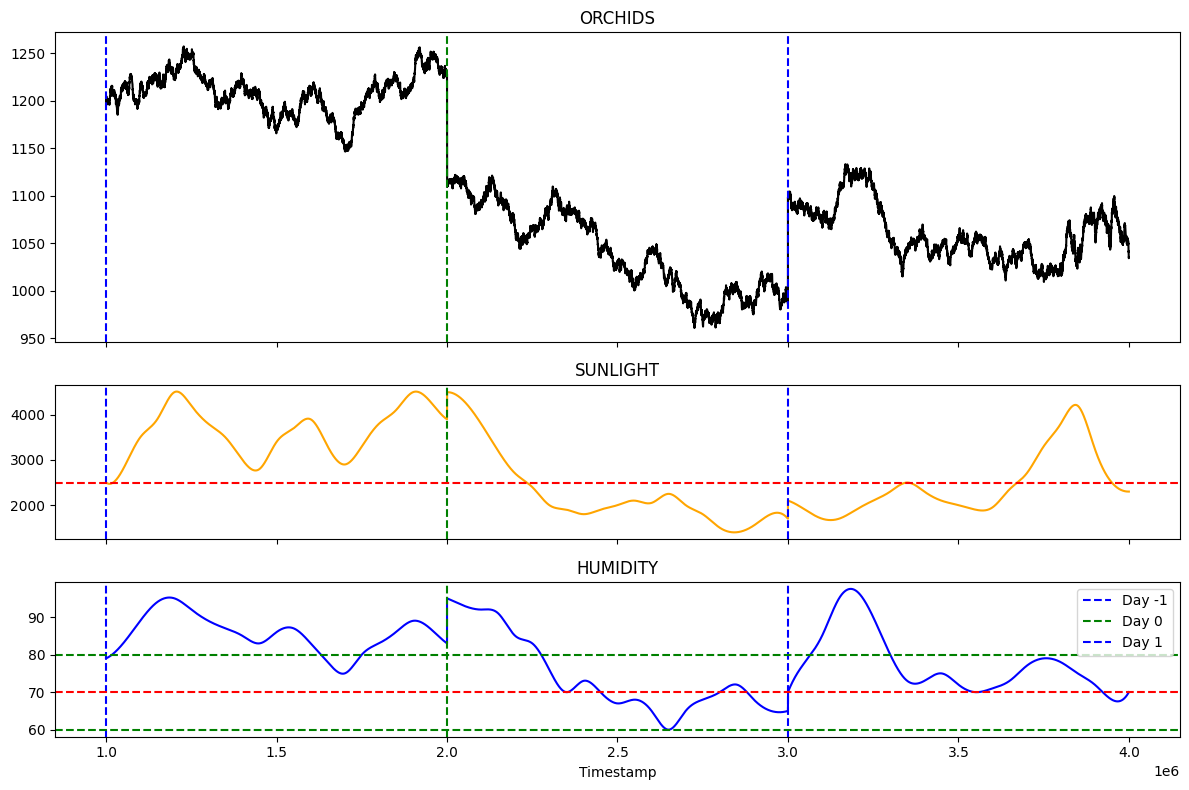

In [281]:
def plot_orchids_sunlight_humidity(df):
    fig, axs = plt.subplots(3, 1, sharex=True, figsize=(12, 8), gridspec_kw={'height_ratios': [2, 1, 1]})

    axs[0].plot(df['timestamp'], df['ORCHIDS'], color='black')
    axs[0].set_title('ORCHIDS')
    
    axs[1].plot(df['timestamp'], df['SUNLIGHT'], color='orange')
    axs[1].set_title('SUNLIGHT')

    axs[2].plot(df['timestamp'], df['HUMIDITY'], color='blue')
    axs[2].set_title('HUMIDITY')
    
    for ax in axs:
        ax.axvline(1_000_000, color='blue', linestyle='--', label='Day -1')
        ax.axvline(2_000_100, color='green', linestyle='--', label='Day 0')
        ax.axvline(3_000_200, color='blue', linestyle='--', label='Day 1')
    
    axs[1].axhline(2500, color='red', linestyle='--')
    axs[2].axhline(60, color='green', linestyle='--')
    axs[2].axhline(70, color='red', linestyle='--')
    axs[2].axhline(80, color='green', linestyle='--')

    axs[-1].set_xlabel('Timestamp')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

plot_orchids_sunlight_humidity(prod_df)

In [282]:
def sunlight_delta(a, c, x):
    denom = 1+a*np.exp(c*(x-2500))
    return 1/(denom)


def humidity_delta(a, c, x):
    denom_1 = 1+a*np.exp(c*(x-60))
    denom_2 = 1+a*np.exp(c*(80-x))
    val1 = 1/denom_1
    val2 = 1/denom_2
    
    return val1 + val2

In [283]:
prod_df['new_sun'] = prod_df['SUNLIGHT'].diff()
prod_df['new_hum'] = prod_df['HUMIDITY'].diff()

humidity_diff = prod_df['HUMIDITY'].diff()
humidity_diff = np.where(prod_df['HUMIDITY'] > 80, humidity_diff*((prod_df['HUMIDITY']-80)*0.4), humidity_diff)
humidity_diff = np.where(prod_df['HUMIDITY'] < 60, humidity_diff*((60-prod_df['HUMIDITY'])*0.4), humidity_diff)
humidity_diff = np.where(prod_df['HUMIDITY'] > 70, humidity_diff, -humidity_diff)
part1 = humidity_diff

sun_diff = prod_df['SUNLIGHT'].diff()
sun_diff = np.where(prod_df['SUNLIGHT'] < 2500, sun_diff, sun_diff)
part2 = sun_diff

In [284]:
prod_df['comb'] = part2
prod_df.loc[0, 'comb'] = np.nan
prod_df.loc[10001, 'comb'] = np.nan
prod_df.loc[20002, 'comb'] = np.nan

In [285]:
prod_df['diff'] = part1 - part2
prod_df.loc[0, 'diff'] = np.nan
prod_df.loc[10001, 'diff'] = np.nan
prod_df.loc[20002, 'diff'] = np.nan

In [294]:
orch = prod_df.ORCHIDS.copy()
X_spread = prod_df[['avg_hum', 'SUNLIGHT', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'TRANSPORT_FEES']].copy()

mod_tets = sm.OLS(orch, X_spread).fit()
spread_orchs = (mod_tets.params * X_spread).sum(axis=1)

prod_df['spread'] = spread_orchs
prod_df.loc[0, 'spread'] = np.nan
prod_df.loc[10001, 'spread'] = np.nan
prod_df.loc[20002, 'spread'] = np.nan

In [295]:
'''
ax4 = ax1.twinx()
color = 'tab:red'
ax4.spines['right'].set_position(('outward', 60))
ax4.set_ylabel('Export', color=color)
ax4.plot(df['timestamp'], df['EXPORT_TARIFF'], color=color)
ax4.tick_params(axis='y', labelcolor=color) 

ax5 = ax1.twinx()
color = 'tab:purple'
ax4.spines['right'].set_position(('outward', 60))
ax5.set_ylabel('Import', color=color)
ax5.plot(df['timestamp'], df['IMPORT_TARIFF'], color=color)
ax5.tick_params(axis='y', labelcolor=color) 
'''

"\nax4 = ax1.twinx()\ncolor = 'tab:red'\nax4.spines['right'].set_position(('outward', 60))\nax4.set_ylabel('Export', color=color)\nax4.plot(df['timestamp'], df['EXPORT_TARIFF'], color=color)\nax4.tick_params(axis='y', labelcolor=color) \n\nax5 = ax1.twinx()\ncolor = 'tab:purple'\nax4.spines['right'].set_position(('outward', 60))\nax5.set_ylabel('Import', color=color)\nax5.plot(df['timestamp'], df['IMPORT_TARIFF'], color=color)\nax5.tick_params(axis='y', labelcolor=color) \n"

In [296]:
def plot_orchids_sunlight_humidity_combined(df):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:pink'
    ax1.set_xlabel('Timestamp (by day)')
    ax1.set_ylabel('ORCHIDS', color=color)
    ax1.plot(df['timestamp'], df['ORCHIDS'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'tab:orange'
    ax2.set_ylabel('SUNLIGHT', color=color)
    ax2.plot(df['timestamp'], df['SUNLIGHT'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    ax3 = ax1.twinx()
    color = 'tab:blue'
    ax3.spines['right'].set_position(('outward', 60))
    ax3.set_ylabel('HUMIDITY', color=color)
    ax3.plot(df['timestamp'], df['HUMIDITY'], color=color)
    ax3.tick_params(axis='y', labelcolor=color)

    ax4 = ax1.twinx()
    color = 'tab:red'
    ax4.set_ylabel('spread', color=color)
    ax4.plot(df['timestamp'], df['spread'], color=color)
    ax4.tick_params(axis='y', labelcolor=color) 

    ax5 = ax1.twinx()
    color = 'tab:purple'
    ax5.set_ylabel('transport', color=color)
    ax5.plot(df['timestamp'], df['TRANSPORT_FEES'], color=color)
    ax5.tick_params(axis='y', labelcolor=color) 

    ax6 = ax1.twinx()
    color = 'tab:green'
    ax6.set_ylabel('export', color=color)
    ax6.plot(df['timestamp'], df['EXPORT_TARIFF'], color=color)
    ax6.tick_params(axis='y', labelcolor=color) 

    ax7 = ax1.twinx()
    color = 'tab:brown'
    ax7.set_ylabel('import', color=color)
    ax7.plot(df['timestamp'], df['IMPORT_TARIFF'], color=color)
    ax7.tick_params(axis='y', labelcolor=color)

    ax3.axhline(60, color='blue', linestyle='--')
    ax3.axhline(80, color='blue', linestyle='--')
    ax2.axhline(2500, color='orange', linestyle='--')

    fig.tight_layout()
    plt.show()

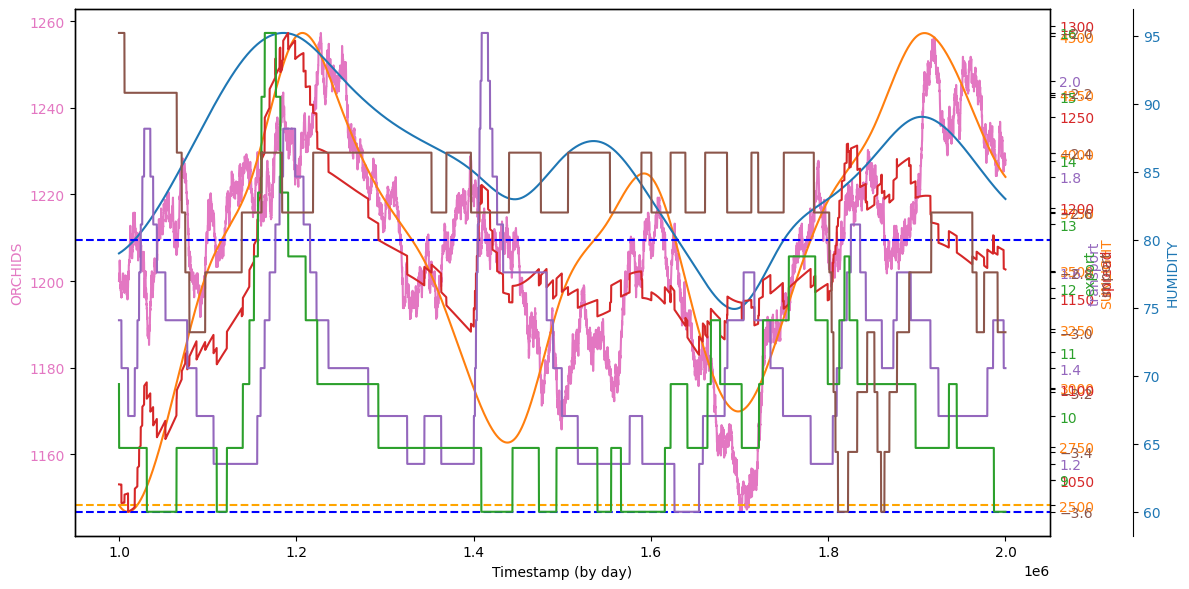

In [325]:
plot_orchids_sunlight_humidity_combined(prod_df.iloc[0:10001])

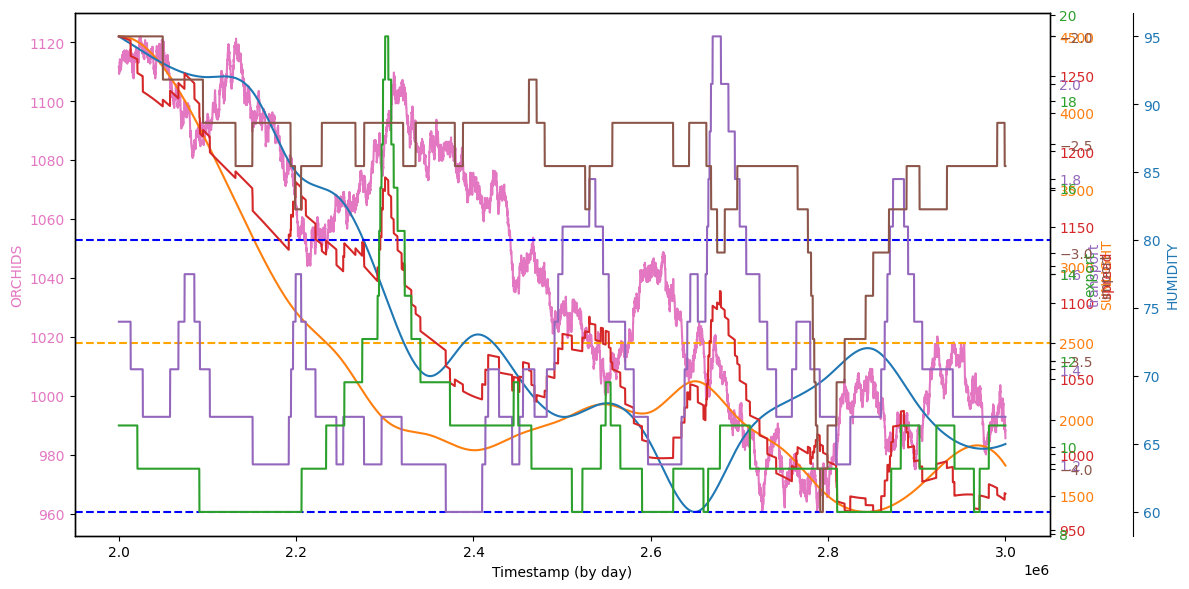

In [298]:
plot_orchids_sunlight_humidity_combined(prod_df.iloc[10001:20002])

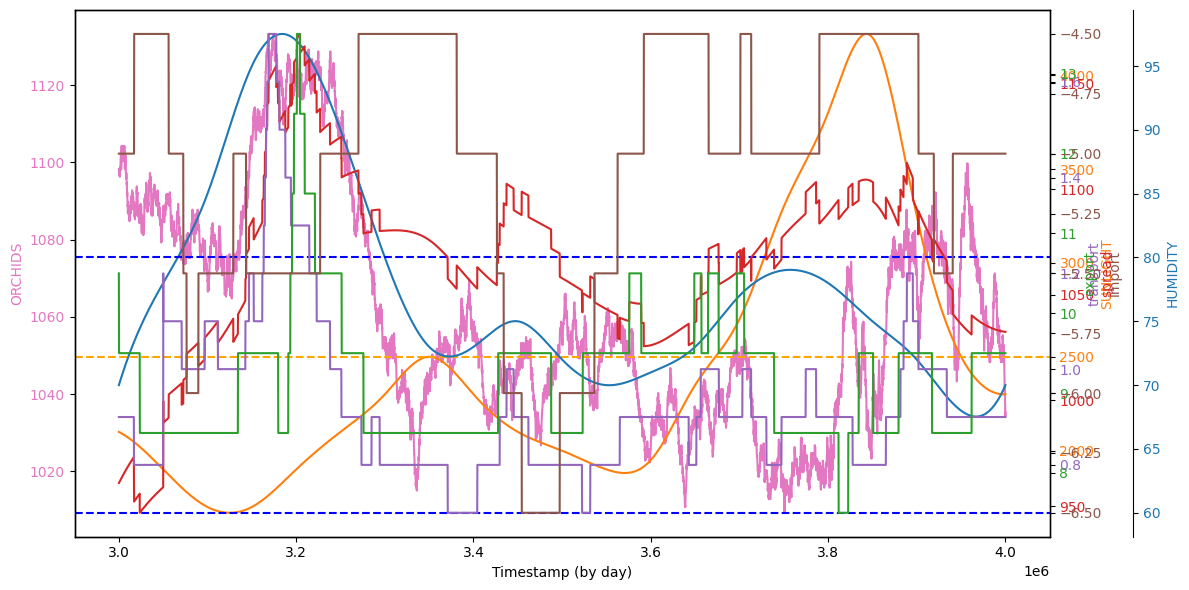

In [299]:
plot_orchids_sunlight_humidity_combined(prod_df.iloc[20002:])

In [165]:
prod_df[prod_df['day'] == -1]

,timestamp,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,day,curr_sun,adj_humidity,...,avg_hum,production,decay_rate_sun,decay_rate_hum,cum_hum,new_sun,new_hum,comb,diff,spread
0,1000000,1200.00,1.5,10.5,-2.0,2500.0000,79.000000,-1,3.000000,0.000000,...,79.000000,1.000000,1.000000,1.000000,79.000000,NaN,NaN,NaN,NaN,NaN
1,1000100,1201.75,1.5,9.5,-2.0,2499.4197,79.004100,-1,5.999304,0.000000,...,79.002050,0.999706,0.999706,1.000000,79.002050,-0.5803,0.004100,-0.5803,0.584400,1038.317422
2,1000200,1201.75,1.5,9.5,-2.0,2498.8457,79.008210,-1,8.997919,0.000000,...,79.004103,0.999412,0.999412,1.000000,79.004103,-0.5740,0.004110,-0.5740,0.578110,1038.325824
3,1000300,1201.75,1.5,9.5,-2.0,2498.2780,79.012340,-1,11.995853,0.000000,...,79.006163,0.999119,0.999119,1.000000,79.006163,-0.5677,0.004130,-0.5677,0.571830,1038.334351
4,1000400,1201.75,1.5,9.5,-2.0,2497.7166,79.016490,-1,14.993113,0.000000,...,79.008228,0.998825,0.998825,1.000000,79.008228,-0.5614,0.004150,-0.5614,0.565550,1038.343008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,1999600,1227.75,1.4,8.5,-3.0,3901.9530,83.025764,-1,43422.623172,0.012103,...,85.622453,0.302058,0.305758,0.987897,85.622453,-0.4938,-0.006476,-0.4938,0.485962,1144.882886
9997,1999700,1226.75,1.4,8.5,-3.0,3901.4612,83.019300,-1,43427.304925,0.012077,...,85.622193,0.302066,0.305758,0.987923,85.622193,-0.4918,-0.006464,-0.4918,0.483993,1144.881532
9998,1999800,1227.75,1.4,8.5,-3.0,3900.9720,83.012856,-1,43431.986092,0.012051,...,85.621932,0.302073,0.305758,0.987949,85.621932,-0.4892,-0.006444,-0.4892,0.481434,1144.880171
9999,1999900,1228.00,1.4,8.5,-3.0,3900.4849,83.006424,-1,43436.666674,0.012026,...,85.621670,0.302081,0.305758,0.987974,85.621670,-0.4871,-0.006432,-0.4871,0.479365,1144.878803


In [166]:
sun_dm1 = prod_df['SUNLIGHT'].iloc[:10001].copy()
hum_dm1 = prod_df['HUMIDITY'].iloc[:10001].copy()
sun_dm1_diff = sun_dm1.diff()
hum_dm1_diff = hum_dm1.diff()

sun_d0 = prod_df['SUNLIGHT'].iloc[10001:20002].copy()
hum_d0 = prod_df['HUMIDITY'].iloc[10001:20002].copy()
sun_d0_diff = sun_d0.diff()
hum_d0_diff = hum_d0.diff()

sun_d1 = prod_df['SUNLIGHT'].iloc[20002:].copy()
hum_d1 = prod_df['HUMIDITY'].iloc[20002:].copy()
sun_d1_diff = sun_d1.diff()
hum_d1_diff = hum_d1.diff()

In [168]:
rd2_df = pd.read_csv('data analysis/Round 2/useful_data/round_2_day_1_joined_table.csv')

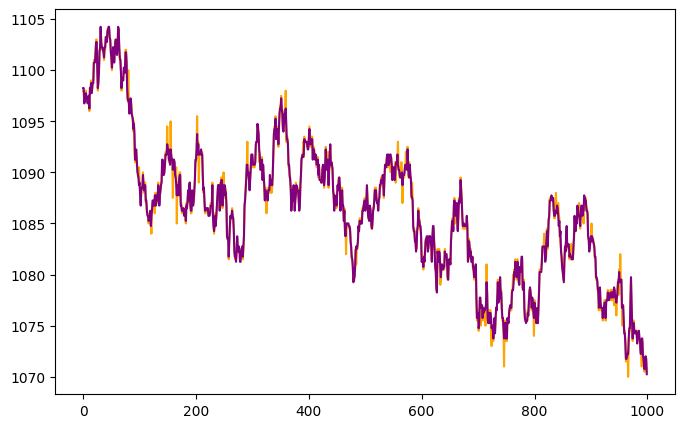

In [169]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(rd2_df)), rd2_df.mid_price, color='orange')
plt.plot(np.arange(len(rd2_df)), rd2_df.ORCHIDS, color='purple')
plt.show()

In [170]:
sunlight_deltas_test = sunlight_delta(1, 0.001, np.array(sun_dm1))
sun_comp = sunlight_deltas_test * sun_dm1.diff()

humidity_deltas_test = sunlight_delta(1, 0.001, np.array(hum_dm1))
hum_comp = humidity_deltas_test * hum_dm1.diff()

In [171]:
(-prod_df.IMPORT_TARIFF.iloc[:20002]-prod_df.TRANSPORT_FEES.iloc[:20002]).mean()

1.1879812018798122

In [172]:
d2_orch = pd.read_csv('manual/cleaned_r2.csv')
d2_orch.drop(columns=['Unnamed: 0'], inplace=True)
d2_orch['timestamp'] = d2_orch.index * 100
d2_orch['ORCHIDS'] = (d2_orch['bidPrice']+d2_orch['askPrice'])/2

d2_orch['curr_sun'] = (d2_orch.SUNLIGHT/ 833.3333).cumsum()

In [173]:
d2_orch['diff'] = d2_orch['HUMIDITY'].diff() + d2_orch['SUNLIGHT'].diff()
d2_orch['spread'] = (d2_orch['SUNLIGHT'] - d2_orch['HUMIDITY']*42.387).diff()

In [174]:
mask_lt_sun = (prod_df['SUNLIGHT'] < 2500).astype(int)
mask_gt_sun = (prod_df['SUNLIGHT'] > 2500).astype(int)
mask_out_hum = ((prod_df['HUMIDITY'] > 80) | (prod_df['HUMIDITY'] < 60)).astype(int)
mask_bet_hum = ((prod_df['HUMIDITY'] <= 80) & (prod_df['HUMIDITY'] >= 60)).astype(int)
mask_downwards = (prod_df['SUNLIGHT'].diff() < 0).astype(int)

In [175]:
vol_df = pd.DataFrame(columns=['LT_SUN/OUT_HUM', 'GT_SUN/OUT_HUM', 'LT_SUN/BET_HUM', 'GT_SUN/BET_HUM'])
vol = 20

for day in [-1,0,1]:
    lst = []
    df = prod_df.copy()
    df = df[df.day == day]
    lst.append(((df['ORCHIDS'].rolling(vol).std())*(mask_out_hum)*(mask_lt_sun)).mean())
    lst.append(((df['ORCHIDS'].rolling(vol).std())*(mask_out_hum)*(mask_gt_sun)).mean())
    lst.append(((df['ORCHIDS'].rolling(vol).std())*(mask_bet_hum)*(mask_lt_sun)).mean())
    lst.append(((df['ORCHIDS'].rolling(vol).std())*(mask_bet_hum)*(mask_gt_sun)).mean())
    vol_df.loc[len(vol_df)] = lst

lst=[]
df = d2_orch.copy()
lst.append(((df['ORCHIDS'].rolling(vol).std())*(mask_out_hum)*(mask_lt_sun)).mean())
lst.append(((df['ORCHIDS'].rolling(vol).std())*(mask_out_hum)*(mask_gt_sun)).mean())
lst.append(((df['ORCHIDS'].rolling(vol).std())*(mask_bet_hum)*(mask_lt_sun)).mean())
lst.append(((df['ORCHIDS'].rolling(vol).std())*(mask_bet_hum)*(mask_gt_sun)).mean())
vol_df.loc[len(vol_df)] = lst

In [176]:
d2_orch['avg_sun'] = d2_orch['SUNLIGHT'].cumsum()
d2_orch['avg_sun'] = d2_orch['avg_sun']/np.arange(1, 10001)

d2_orch['avg_hum'] = d2_orch['HUMIDITY'].cumsum()
d2_orch['avg_hum']= d2_orch['avg_hum']/np.arange(1, 10001)

In [254]:
X_spread_rd2 = d2_orch[['avg_hum', 'SUNLIGHT', 'EXPORT_TARIFF', 'IMPORT_TARIFF', 'TRANSPORT_FEES']].copy()

spread_orchs_rd2 = (mod_tets.params * X_spread_rd2).sum(axis=1)

d2_orch['spread'] = spread_orchs_rd2

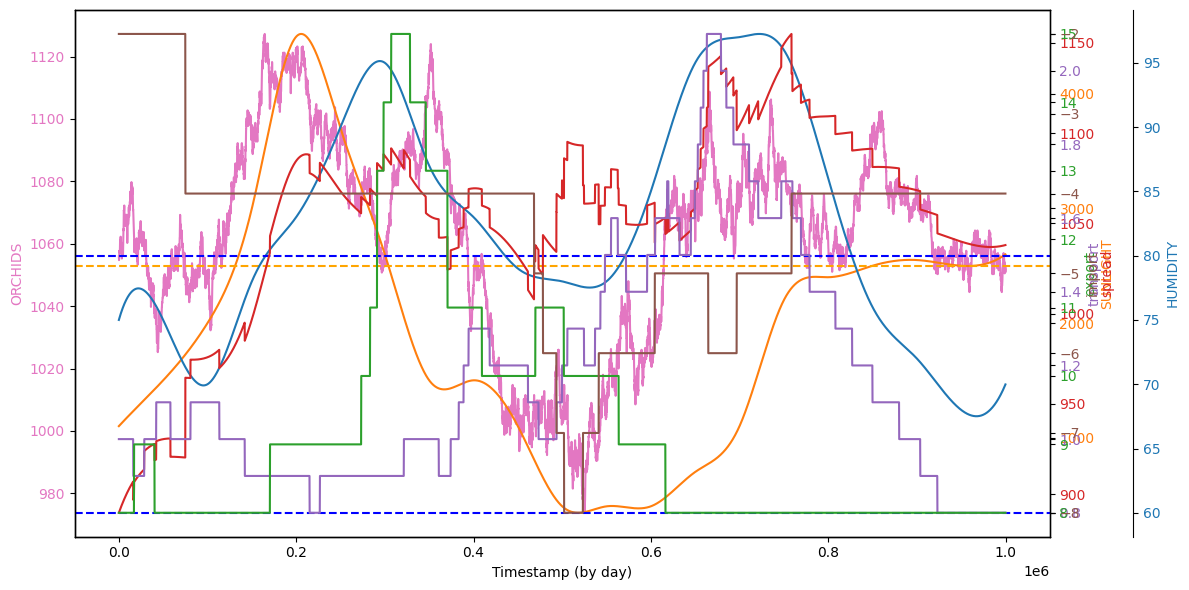

In [255]:
plot_orchids_sunlight_humidity_combined(d2_orch)

CHANGES CAUSED BY IMPORT/EXPORT TARIFFS?

In [179]:
rd3_data = de1.data['round_3']['price_df']

gifts = rd3_data[rd3_data['product'] == 'GIFT_BASKET']
chocolate = rd3_data[rd3_data['product'] == 'CHOCOLATE']
roses = rd3_data[rd3_data['product'] == 'ROSES']
strawberries = rd3_data[rd3_data['product'] == 'STRAWBERRIES']

etf = pd.DataFrame(columns=['CHOCOLATE', 'ROSES', 'STRAWBERRIES'])
etf['CHOCOLATE'] = chocolate.mid_price
etf['ROSES'] = list(roses.mid_price)
etf['STRAWBERRIES'] = list(strawberries.mid_price)
etf.reset_index(inplace=True, drop=True)

underlying_mid = gifts.mid_price.copy()
underlying_mid.reset_index(inplace=True, drop=True)

synthetic_price = etf['CHOCOLATE']*4 + etf['ROSES'] + etf['STRAWBERRIES']*6 + 380
spread = underlying_mid - synthetic_price

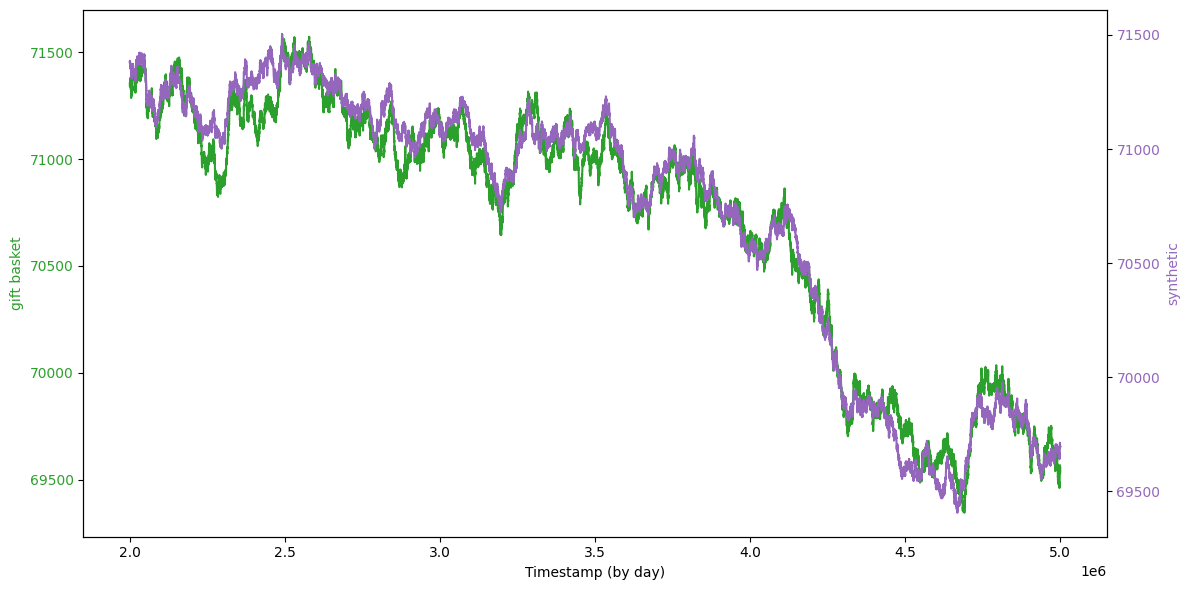

In [180]:
fig, ax1 = plt.subplots(figsize=(12, 6))

bound1 = 0
bound2 = 30000

color = 'tab:green'
ax1.set_xlabel('Timestamp (by day)')
ax1.set_ylabel('gift basket', color=color)
ax1.plot(gifts.timestamp.iloc[bound1:bound2], underlying_mid[bound1:bound2], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:purple'
ax2.set_ylabel('synthetic', color=color)
ax2.plot(gifts.timestamp.iloc[bound1:bound2], synthetic_price.iloc[bound1:bound2], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

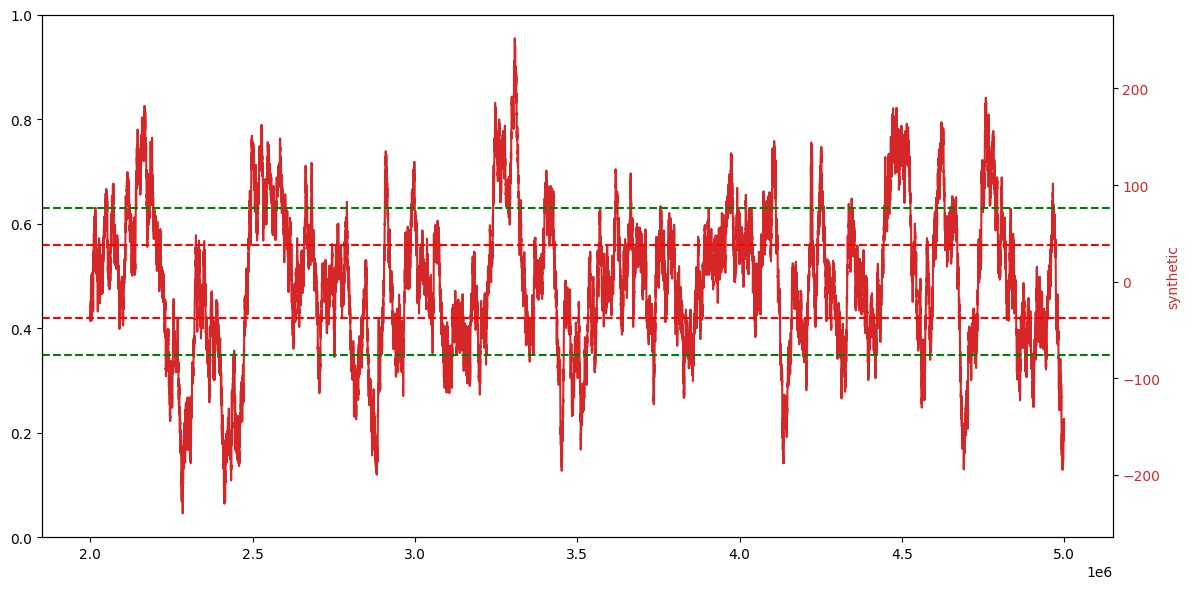

In [181]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1 = ax1.twinx()
color = 'tab:red'
ax1.set_ylabel('synthetic', color=color)
ax1.plot(gifts.timestamp.iloc[bound1:bound2], spread.iloc[bound1:bound2], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.axhline(spread.std(), color='green', linestyle='--')
ax1.axhline(-spread.std(), color='green', linestyle='--')
ax1.axhline(spread.std()*0.5, color='red', linestyle='--')
ax1.axhline(-spread.std()*0.5, color='red', linestyle='--')

fig.tight_layout()
plt.show()

In [317]:
spread_roses = etf['ROSES'] - (underlying_mid - 380 - etf['CHOCOLATE']*4 - 6*etf['STRAWBERRIES'])
spread_choco = etf['CHOCOLATE'] - (underlying_mid - 380 - etf['ROSES'] - 6*etf['STRAWBERRIES'])/4
spread_straw = etf['STRAWBERRIES'] - (underlying_mid - 380 - etf['CHOCOLATE']*4 - etf['ROSES'])/6

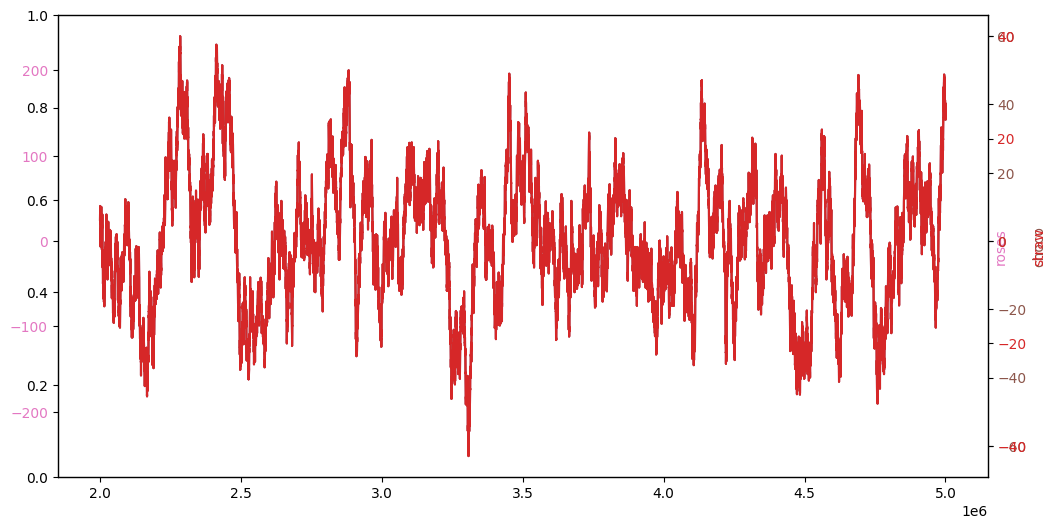

In [322]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1 = ax1.twinx()
color = 'tab:pink'
ax1.set_ylabel('roses', color=color)
ax1.plot(gifts.timestamp, spread_roses, color=color)
ax1.tick_params(axis='y', labelcolor=color) 

ax2 = ax1.twinx()
color = 'tab:brown'
ax2.set_ylabel('choco', color=color)
ax2.plot(gifts.timestamp, spread_choco, color=color)
ax2.tick_params(axis='y', labelcolor=color) 

ax3 = ax1.twinx()
color = 'tab:red'
ax3.set_ylabel('straw', color=color)
ax3.plot(gifts.timestamp, spread_straw, color=color)
ax3.tick_params(axis='y', labelcolor=color)

In [183]:
mid_etf = gifts.mid_price.copy()
mid_etf.reset_index(inplace=True, drop=True)

X_etf = etf.copy()
X_etf['CHOCOLATE'] = X_etf['CHOCOLATE'].pct_change()
X_etf['STRAWBERRIES'] = X_etf['STRAWBERRIES'].pct_change()
X_etf['ROSES'] = X_etf['ROSES'].pct_change()
X_etf.dropna(inplace=True)

model_etf = sm.OLS(mid_etf.pct_change().dropna(), X_etf).fit()
model_etf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              mid_price   R-squared (uncentered):                   0.405
Model:                            OLS   Adj. R-squared (uncentered):              0.405
Method:                 Least Squares   F-statistic:                              6810.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):                        0.00
Time:                        21:37:30   Log-Likelihood:                      2.3767e+05
No. Observations:               29999   AIC:                                 -4.753e+05
Df Residuals:                   29996   BIC:                                 -4.753e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
CHOCOLATE        0.4264      0.004    108.610      0.000       0.419       0.434
ROSES            0.2022      0.003     75.356      0.000       0.197       0.207
STRAWBERRIES     0.2473      0.005     53.890      0.000       0.238       0.256
==============================================================================
Omnibus:                        0.065   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.968   Jarque-Bera (JB):                0.059
Skew:                           0.003   Prob(JB):                        0.971
Kurtosis:                       3.004   Cond. No.                         1.71
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
def manual_rd_3_deriv(multi, hunter, p=0):
    return -multi * (1/(p+hunter**2))


def manual_rd_3(multi, hunter, p=0):
    return multi * (1/(p+hunter))

In [185]:
def calc_rd3_manual_df(multi_lst, hunters_lst, pct_dist):
    deriv_dict = {}
    for i in range(len(multi_lst)):
        deriv = manual_rd_3_deriv(multi_lst[i], hunters_lst[i])
        base = manual_rd_3(multi_lst[i], hunters_lst[i])
        new = manual_rd_3(multi_lst[i], hunters_lst[i], pct_dist[i])
        diff = new-base
        diff_pct = new/base
        deriv_dict[i] = (multi_lst[i], hunters_lst[i], base, new, diff, diff_pct, deriv)

    df = pd.DataFrame(deriv_dict).T
    df.rename(columns={0:'multi', 1:'hunters', 2: 'base', 3: 'new_val', 4:'diff', 5:'diff_pct', 6:'deriv'}, inplace=True)

    return df

In [186]:
multi_lst = [24, 70, 41, 21, 60, 47, 82, 87, 80, 35, 73, 89, 100, 90, 17, 77, 83, 85, 79, 55, 12, 27, 52, 15, 30]
hunters_lst = [2, 4, 3, 2, 4, 3, 5, 5, 5, 3, 4, 5, 8, 7, 2, 5, 5, 5, 5, 4, 2, 3, 4, 2, 3]
pct_dist_uniform = [4]*len(multi_lst)

uniform = calc_rd3_manual_df(multi_lst, hunters_lst, pct_dist_uniform)

In [187]:
z_val = (uniform.base - uniform.base.mean())/uniform.base.std()
uniform['cdf'] = norm.cdf(z_val)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


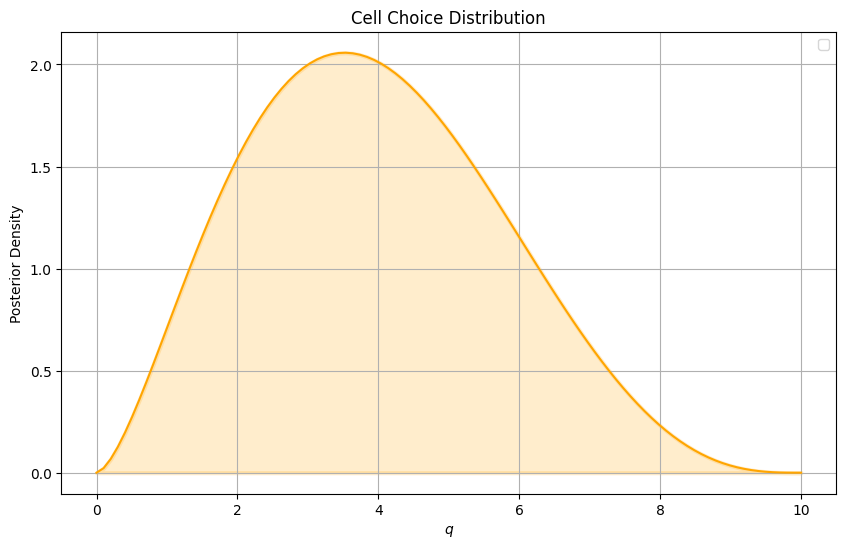

In [188]:
q = np.linspace(0, 10, 100)

factor = 0.6575
bet = 4
alp = bet*factor
pdf_values = st.beta.pdf(q/10, alp, bet)

plt.figure(figsize=(10, 6))
plt.plot(q, pdf_values, color='orange')
plt.fill_between(q, pdf_values, color='orange', alpha=0.2, lw=3)
plt.xlabel('$q$')
plt.ylabel('Posterior Density')
plt.title('Cell Choice Distribution')
plt.legend()
plt.grid(True)
plt.show()

In [189]:
uniform['beta_dist'] = st.beta.ppf(uniform.cdf, alp, bet)*10
uniform['beta_dist'].sum()

100.03299686676546

In [190]:
updated_rd3_df1 = calc_rd3_manual_df(multi_lst, hunters_lst, uniform.beta_dist)
updated_rd3_df1['pct_dist'] = uniform.beta_dist
updated_rd3_df1

,multi,hunters,base,new_val,diff,diff_pct,deriv,pct_dist
0,24.0,2.0,12.000000,4.805082,-7.194918,0.400424,-6.000000,2.994712
1,70.0,4.0,17.500000,6.928233,-10.571767,0.395899,-4.375000,6.103587
2,41.0,3.0,13.666667,5.941714,-7.724952,0.434760,-4.555556,3.900365
3,21.0,2.0,10.500000,4.923626,-5.576374,0.468917,-5.250000,2.265150
4,60.0,4.0,15.000000,6.922781,-8.077219,0.461519,-3.750000,4.667038
5,47.0,3.0,15.666667,5.834837,-9.831829,0.372436,-5.222222,5.055066
6,82.0,5.0,16.400000,7.824483,-8.575517,0.477103,-3.280000,5.479926
7,87.0,5.0,17.400000,7.874809,-9.525191,0.452575,-3.480000,6.047887
8,80.0,5.0,16.000000,7.805865,-8.194135,0.487867,-3.200000,5.248704
9,35.0,3.0,11.666667,6.009128,-5.657538,0.515068,-3.888889,2.824472


In [191]:
pcts = np.arange(0, 10.1, 0.1)

plot_dict = {}

for i in range(len(updated_rd3_df1)):
    multi = updated_rd3_df1.multi.iloc[i]
    hunter = updated_rd3_df1.hunters.iloc[i]
    pct_lst = []
    for pct in pcts:
        pct_lst.append(manual_rd_3(multi, hunter, p=pct))
    plot_dict[(multi, hunter)] = pct_lst

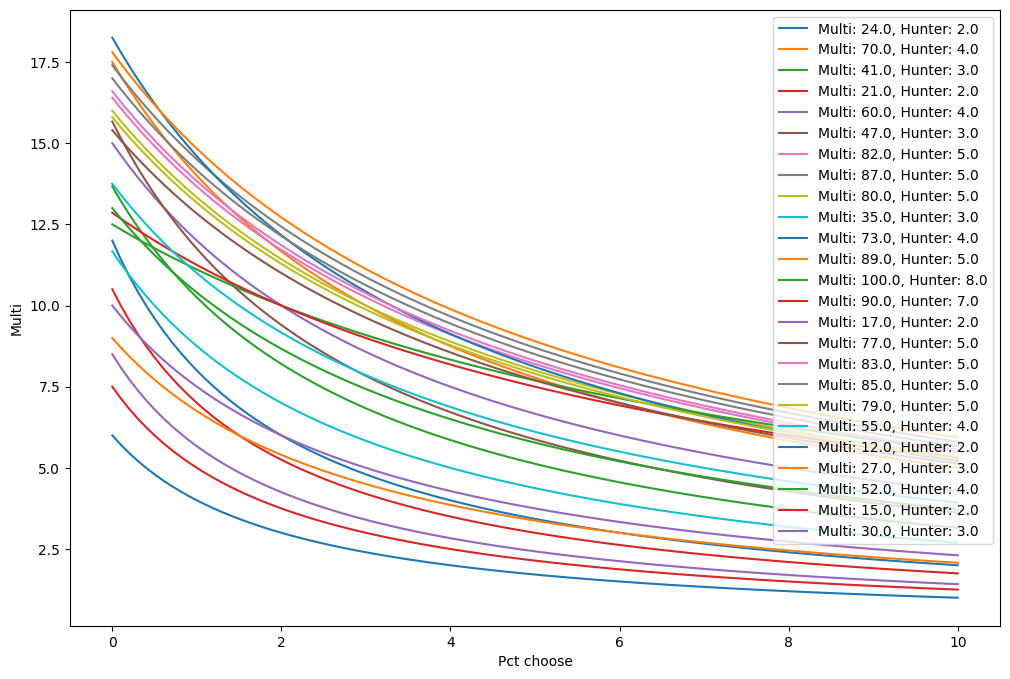

In [192]:
plt.figure(figsize=(12, 8))

for combo, vals in plot_dict.items():
    multi, hunter = combo
    plt.plot(pcts, vals, label=f'Multi: {multi}, Hunter: {hunter}')
    
plt.xlabel('Pct choose')
plt.ylabel('Multi')
plt.legend()
plt.show()